# Análisis temporal

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 200)

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv')
pd.options.mode.chained_assignment = None

C:\Users\Juan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Analizo el rango temporal de la columna "timestamp"

In [4]:
df["timestamp"].min()

'2018-01-01 07:32:26'

In [5]:
df["timestamp"].max()

'2018-06-15 23:59:31'

# Cantidad de visitas a lo largo del tiempo

Para la cantidad de visitas, se computarán todos los eventos "visited site" por usuario y por día, de forma tal que si un día el usuario no presenta el evento de visita pero se registró algún otro eevento, este caso también se compute como una visita.

In [6]:
df_visitas =  df[['timestamp','person','event']]
df_visitas['timestamp'] = pd.to_datetime(df_visitas['timestamp'])
df_visitas = df_visitas.sort_values(by=["timestamp"])
df_visitas['just_date'] = df_visitas['timestamp'].dt.date

In [7]:
def visited (row):
   if row['event'] == 'visited site':
      return 1
   return 0

In [8]:
df_visitas["visitas"] = df.apply(lambda row: visited (row),axis=1)
visitas_por_persona_por_dia = df_visitas.groupby(["person","just_date"]).agg({'visitas':'sum'})
visitas_por_persona_por_dia["visitas"]=visitas_por_persona_por_dia["visitas"].replace(0,1)

In [9]:
visitas_por_persona_por_dia.head(50)

visitas
person   just_date          
0004b0a2 2018-05-31        1
0006a21a 2018-05-29        1
000a54b2 2018-04-09        1
         2018-05-24        1
00184bf9 2018-04-06        1
         2018-05-04        1
         2018-05-17        1
0019c395 2018-05-17        1
001bb7eb 2018-06-06        1
         2018-06-08        1
001f1653 2018-05-29        1
00204059 2018-01-18        1
         2018-01-31        1
         2018-02-01        1
         2018-02-02        1
         2018-02-06        1
         2018-02-08        1
         2018-02-14        1
         2018-02-15        3
         2018-02-16        1
         2018-03-20        1
         2018-05-19        1
0020f73c 2018-06-12        1
0024a82b 2018-05-30        1
0024ad28 2018-05-21        1
         2018-05-24        1
         2018-05-28        1
00269e77 2018-05-14        1
         2018-06-05        1
         2018-06-07        2
0026fd72 2018-06-14        2
0027c344 2018-06-05        1
         2018-06-12        2
00283a9e 2018-06-02        1
         2018-06-15        1
002932b1 2018-05-03        1
         2018-05-29        1
         2018-05-30        2
002cecfa 2018-05-16        1
002f3084 2018-06-09        1
00300ace 2018-05-28        2
00344c0a 2018-06-13        1
003857f6 2018-04-06        1
         2018-05-10        1
         2018-05-11        2
         2018-05-14        1
         2018-06-06        1
         2018-06-07        1
003f561a 2018-06-06        2
003ff6cd 2018-05-16        1

In [10]:
visitas_por_dia = visitas_por_persona_por_dia.groupby(['just_date']).agg({'visitas':'sum'})

In [11]:
visitas_por_dia.head(50)

,visitas
just_date,
2018-01-01,8
2018-01-02,22
2018-01-03,32
2018-01-04,37
2018-01-05,49
2018-01-06,30
2018-01-07,39
2018-01-08,51
2018-01-09,66


<Figure size 640x480 with 0 Axes>

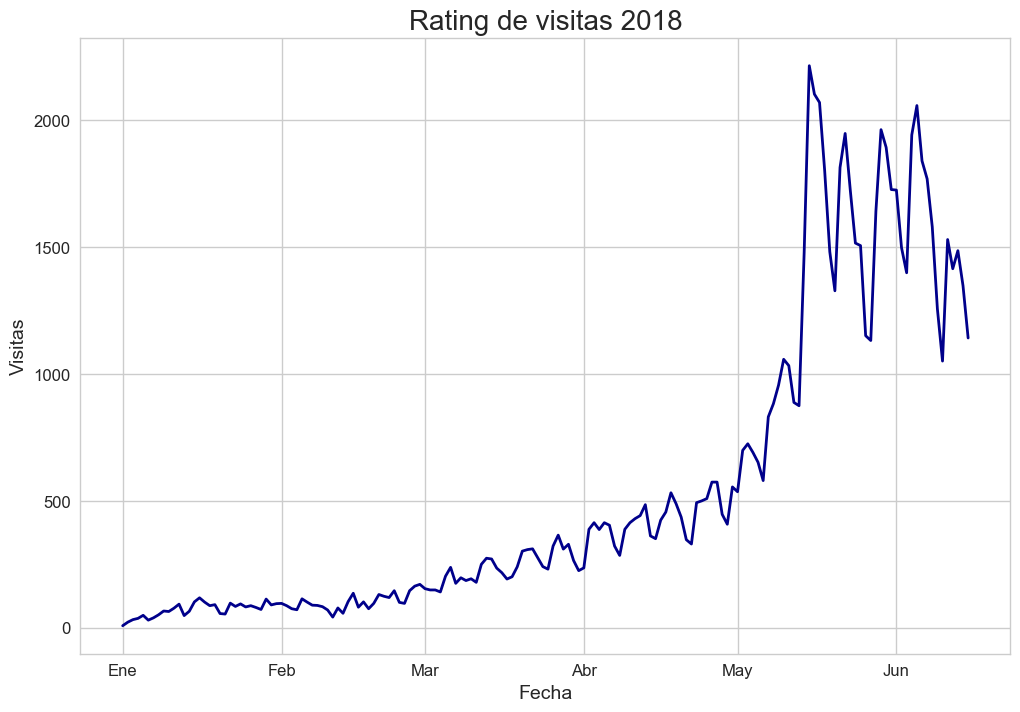

In [13]:
plt.figure()
g1 = visitas_por_dia.plot(kind='line', color={'darkblue'},linewidth=2,figsize=(12,8),title='Rating de visitas 2018',
                          legend=False,fontsize=12)
g1.set_xlabel("Fecha",fontsize=14)
g1.set_ylabel("Visitas",fontsize=14)
x_lab=['Ene','Feb','Mar','Abr','May','Jun']
g1.set_xticklabels(x_lab)
g1.title.set_size(20)



# Cantidad y proporción de conversiones a lo largo del tiempo

In [14]:
def converted (row):
   if row['event'] == 'conversion':
      return 1
   return 0

In [15]:
df_visitas["conversiones"] = df.apply(lambda row: converted (row),axis=1)


In [16]:
visitas_por_dia["conversiones"] = df_visitas.groupby(["just_date"]).agg({'conversiones':'sum'})

In [17]:
visitas_por_dia.head(50)

,visitas,conversiones
just_date,,
2018-01-01,8,0
2018-01-02,22,0
2018-01-03,32,0
2018-01-04,37,2
2018-01-05,49,3
2018-01-06,30,0
2018-01-07,39,2
2018-01-08,51,3
2018-01-09,66,3


<Figure size 640x480 with 0 Axes>

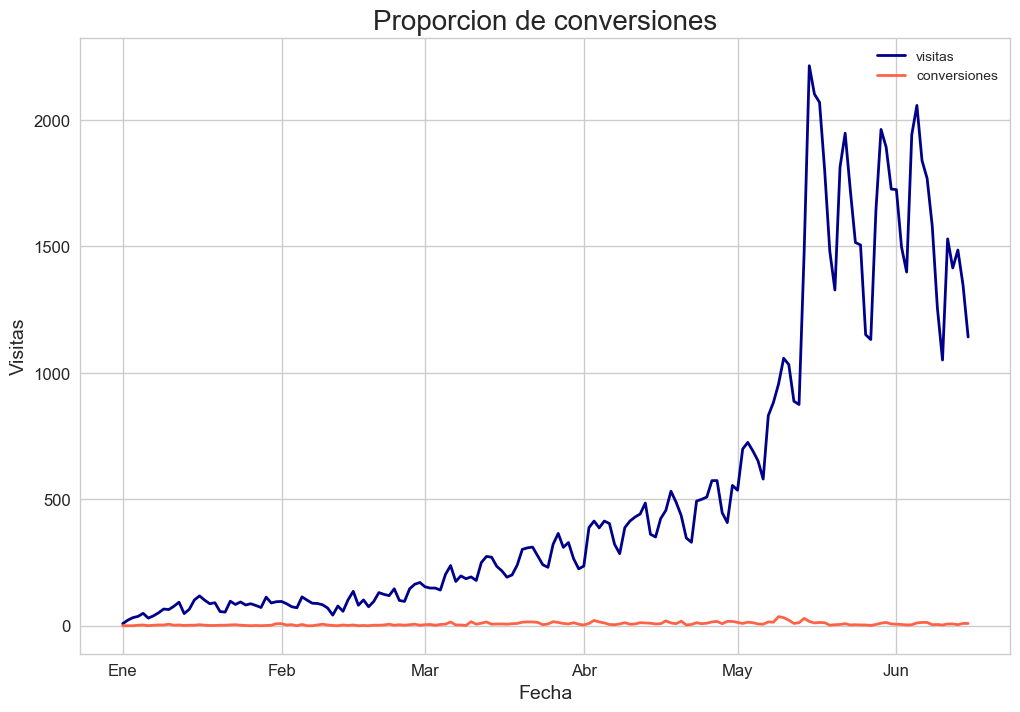

In [19]:
plt.figure()
g2 = visitas_por_dia.plot(kind='line',color={'darkblue','tomato'}, linewidth=2,figsize=(12,8),title='Proporcion de conversiones',
                          legend=True,fontsize=12)
g2.set_xlabel("Fecha",fontsize=14)
g2.set_ylabel("Visitas",fontsize=14)
x_lab=['Ene','Feb','Mar','Abr','May','Jun']
g2.set_xticklabels(x_lab)
g2.title.set_size(20)

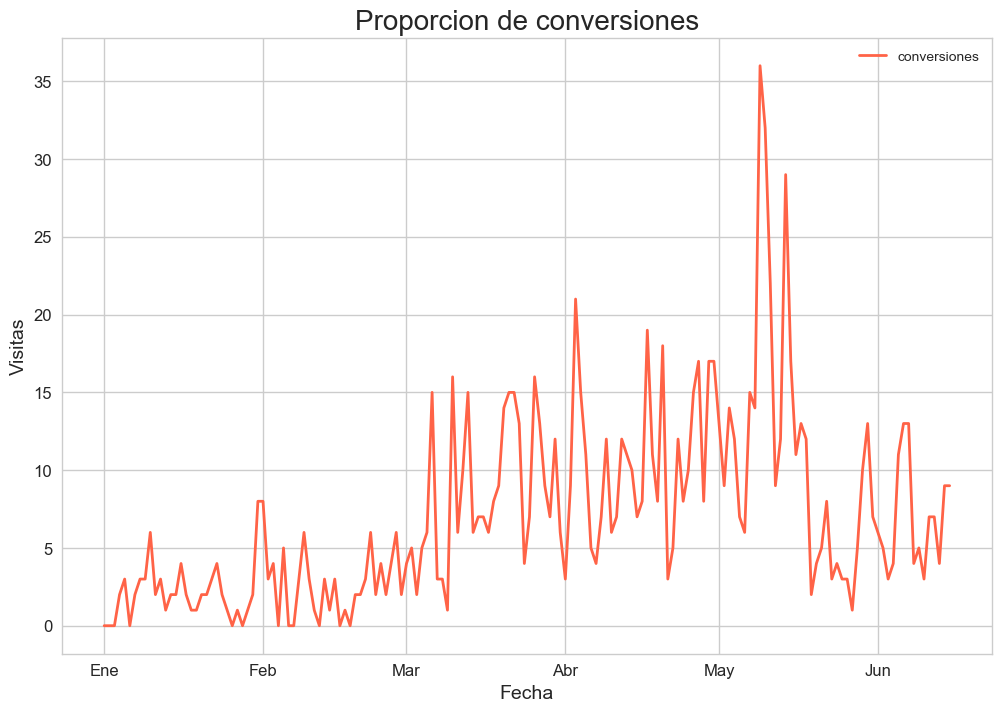

In [21]:
plt.figure()
g3 = visitas_por_dia["conversiones"].plot(kind='line',color='tomato',linewidth=2,figsize=(12,8),title='Proporcion de conversiones',
                          legend=True,fontsize=12)
g3.set_xlabel("Fecha",fontsize=14)
g3.set_ylabel("Visitas",fontsize=14)
x_lab=['Ene','Feb','Mar','Abr','May','Jun']
g3.set_xticklabels(x_lab)
g3.title.set_size(20)
fig = g3.get_figure()


# Cantidad de visitas de un usuario por dia

In [22]:
df_cant_visitas =visitas_por_persona_por_dia["visitas"].value_counts().to_frame()

In [23]:
df_cant_visitas.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 13, 42, 35], dtype='int64')

In [24]:
df_cant_visitas=df_cant_visitas.transpose()
df_cant_visitas

,1,2,3,4,5,6,7,8,9,10,11,12,14,13,42,35
visitas,52767,9763,2822,1003,364,159,71,44,24,21,6,4,3,3,1,1


Unifico los grupos de visitas de mas de 5 veces por día para tener un numero representativo

In [25]:
v =  [5, 6, 7, 8, 9, 10, 11, 12, 14, 13, 42, 35]

In [26]:
def sumar_cols(data,vector):
    columna = 0
    for i in vector:
        columna = columna + data[i]
        del data[i]
    return columna

In [27]:
df_cant_visitas['+5']=sumar_cols(df_cant_visitas,v)

In [28]:
df_cant_visitas

,1,2,3,4,+5
visitas,52767,9763,2822,1003,701


Quiero analizar los eventos ocurridos para cada subconjunto (para los de visitas unicas por dia, 2 visitas por dia, 3,4,+5). 

In [29]:
df_eventos_visitas = pd.merge(visitas_por_persona_por_dia,df_visitas, on=['person','just_date'], how='inner').rename(index=str, columns={"visitas_x": "visitas"})


In [30]:
ct = pd.crosstab(df_eventos_visitas.event, df_eventos_visitas.visitas)

In [31]:
ct

visitas,1,2,3,4,5,6,7,8,9,10,11,12,13,14,35,42
event,,,,,,,,,,,,,,,,
ad campaign hit,54264,17171,6422,2840,1123,594,205,76,75,34,13,4,1,3,1,1
brand listing,58316,22403,9472,4538,1627,908,453,284,129,188,66,121,45,47,15,23
checkout,27095,4095,1407,599,289,136,66,27,6,10,0,1,1,2,0,1
conversion,580,232,149,89,62,29,15,11,2,3,0,0,0,0,0,0
generic listing,40919,14676,5913,2893,1314,680,371,204,243,169,60,44,40,2,1,5
lead,224,84,57,31,31,10,6,4,1,0,0,0,0,0,0,0
search engine hit,34876,9892,3478,1564,539,296,175,70,23,27,9,4,2,1,1,0
searched products,32475,12679,5768,2844,1110,673,205,180,73,27,15,9,10,5,0,0
staticpage,1611,825,534,244,177,98,44,29,13,13,0,7,3,0,0,0


Unifico de la misma forma que antes esta tabla

In [32]:
ct['+5']=sumar_cols(ct,v)


In [33]:
ct

visitas,1,2,3,4,+5
event,,,,,
ad campaign hit,54264,17171,6422,2840,2130
brand listing,58316,22403,9472,4538,3906
checkout,27095,4095,1407,599,539
conversion,580,232,149,89,122
generic listing,40919,14676,5913,2893,3133
lead,224,84,57,31,52
search engine hit,34876,9892,3478,1564,1147
searched products,32475,12679,5768,2844,2307
staticpage,1611,825,534,244,384


Para poder realizar un analisis porcentual, divido los valores de la columna segun la cantidad de visitas dada por "df_cant_visitas".

In [34]:
def porcentual(data,inicio,fin,total):
    for i in range(inicio,fin):
        data[i] = (data[i]/total[i])*100
    return

In [35]:
porcentual(ct,1,5,df_cant_visitas.loc["visitas"])
ct['+5']=ct['+5']/df_cant_visitas.loc["visitas"]['+5']*100
ct=ct.round(1)

In [36]:
ct

visitas,1,2,3,4,+5
event,,,,,
ad campaign hit,102.8,175.9,227.6,283.2,303.9
brand listing,110.5,229.5,335.6,452.4,557.2
checkout,51.3,41.9,49.9,59.7,76.9
conversion,1.1,2.4,5.3,8.9,17.4
generic listing,77.5,150.3,209.5,288.4,446.9
lead,0.4,0.9,2.0,3.1,7.4
search engine hit,66.1,101.3,123.2,155.9,163.6
searched products,61.5,129.9,204.4,283.5,329.1
staticpage,3.1,8.5,18.9,24.3,54.8


In [37]:
ct=ct.reset_index()
event=ct["event"]

Procedo a normalizar las filas para realizar un analisis porcentual entre las mismas. Para ello se necesita calcular la suma de cada una: 'total'

In [38]:
ct['total']=ct[1]+ct[2]+ct[3]+ct[4]+ct['+5']

In [39]:
ct

visitas,event,1,2,3,4,+5,total
0,ad campaign hit,102.8,175.9,227.6,283.2,303.9,1093.4
1,brand listing,110.5,229.5,335.6,452.4,557.2,1685.2
2,checkout,51.3,41.9,49.9,59.7,76.9,279.7
3,conversion,1.1,2.4,5.3,8.9,17.4,35.1
4,generic listing,77.5,150.3,209.5,288.4,446.9,1172.6
5,lead,0.4,0.9,2.0,3.1,7.4,13.8
6,search engine hit,66.1,101.3,123.2,155.9,163.6,610.1
7,searched products,61.5,129.9,204.4,283.5,329.1,1008.4
8,staticpage,3.1,8.5,18.9,24.3,54.8,109.6
9,viewed product,594.2,1221.3,1811.2,2355.6,3054.4,9036.7


In [40]:
def normalizar_filas(data,inicio_f,fin_f,inicio_c,fin_c):
    for i in range (inicio_f,fin_f):
        for j in range(inicio_c,fin_c):
            data.transpose()[i][j]=data.transpose()[i][j]/data.transpose()[i]['total']
    return

In [41]:
ct=ct.rename(index=str, columns={"+5": 5})
ct.index=[0,1,2,3,4,5,6,7,8,9,10]
ct=ct.drop(["event"],axis=1)
normalizar_filas(ct,0,11,1,6)
ct.index=event
ct=ct.drop(["total"],axis=1)
ct=ct.rename(index=str, columns={5: "+5"})

In [42]:
ct

visitas,1,2,3,4,+5
event,,,,,
ad campaign hit,0.094019,0.160874,0.208158,0.259009,0.277940
brand listing,0.065571,0.136186,0.199146,0.268455,0.330643
checkout,0.183411,0.149803,0.178405,0.213443,0.274937
conversion,0.031339,0.068376,0.150997,0.253561,0.495726
generic listing,0.066092,0.128177,0.178663,0.245949,0.381119
lead,0.028986,0.065217,0.144928,0.224638,0.536232
search engine hit,0.108343,0.166038,0.201934,0.255532,0.268153
searched products,0.060988,0.128818,0.202697,0.281138,0.326359
staticpage,0.028285,0.077555,0.172445,0.221715,0.500000


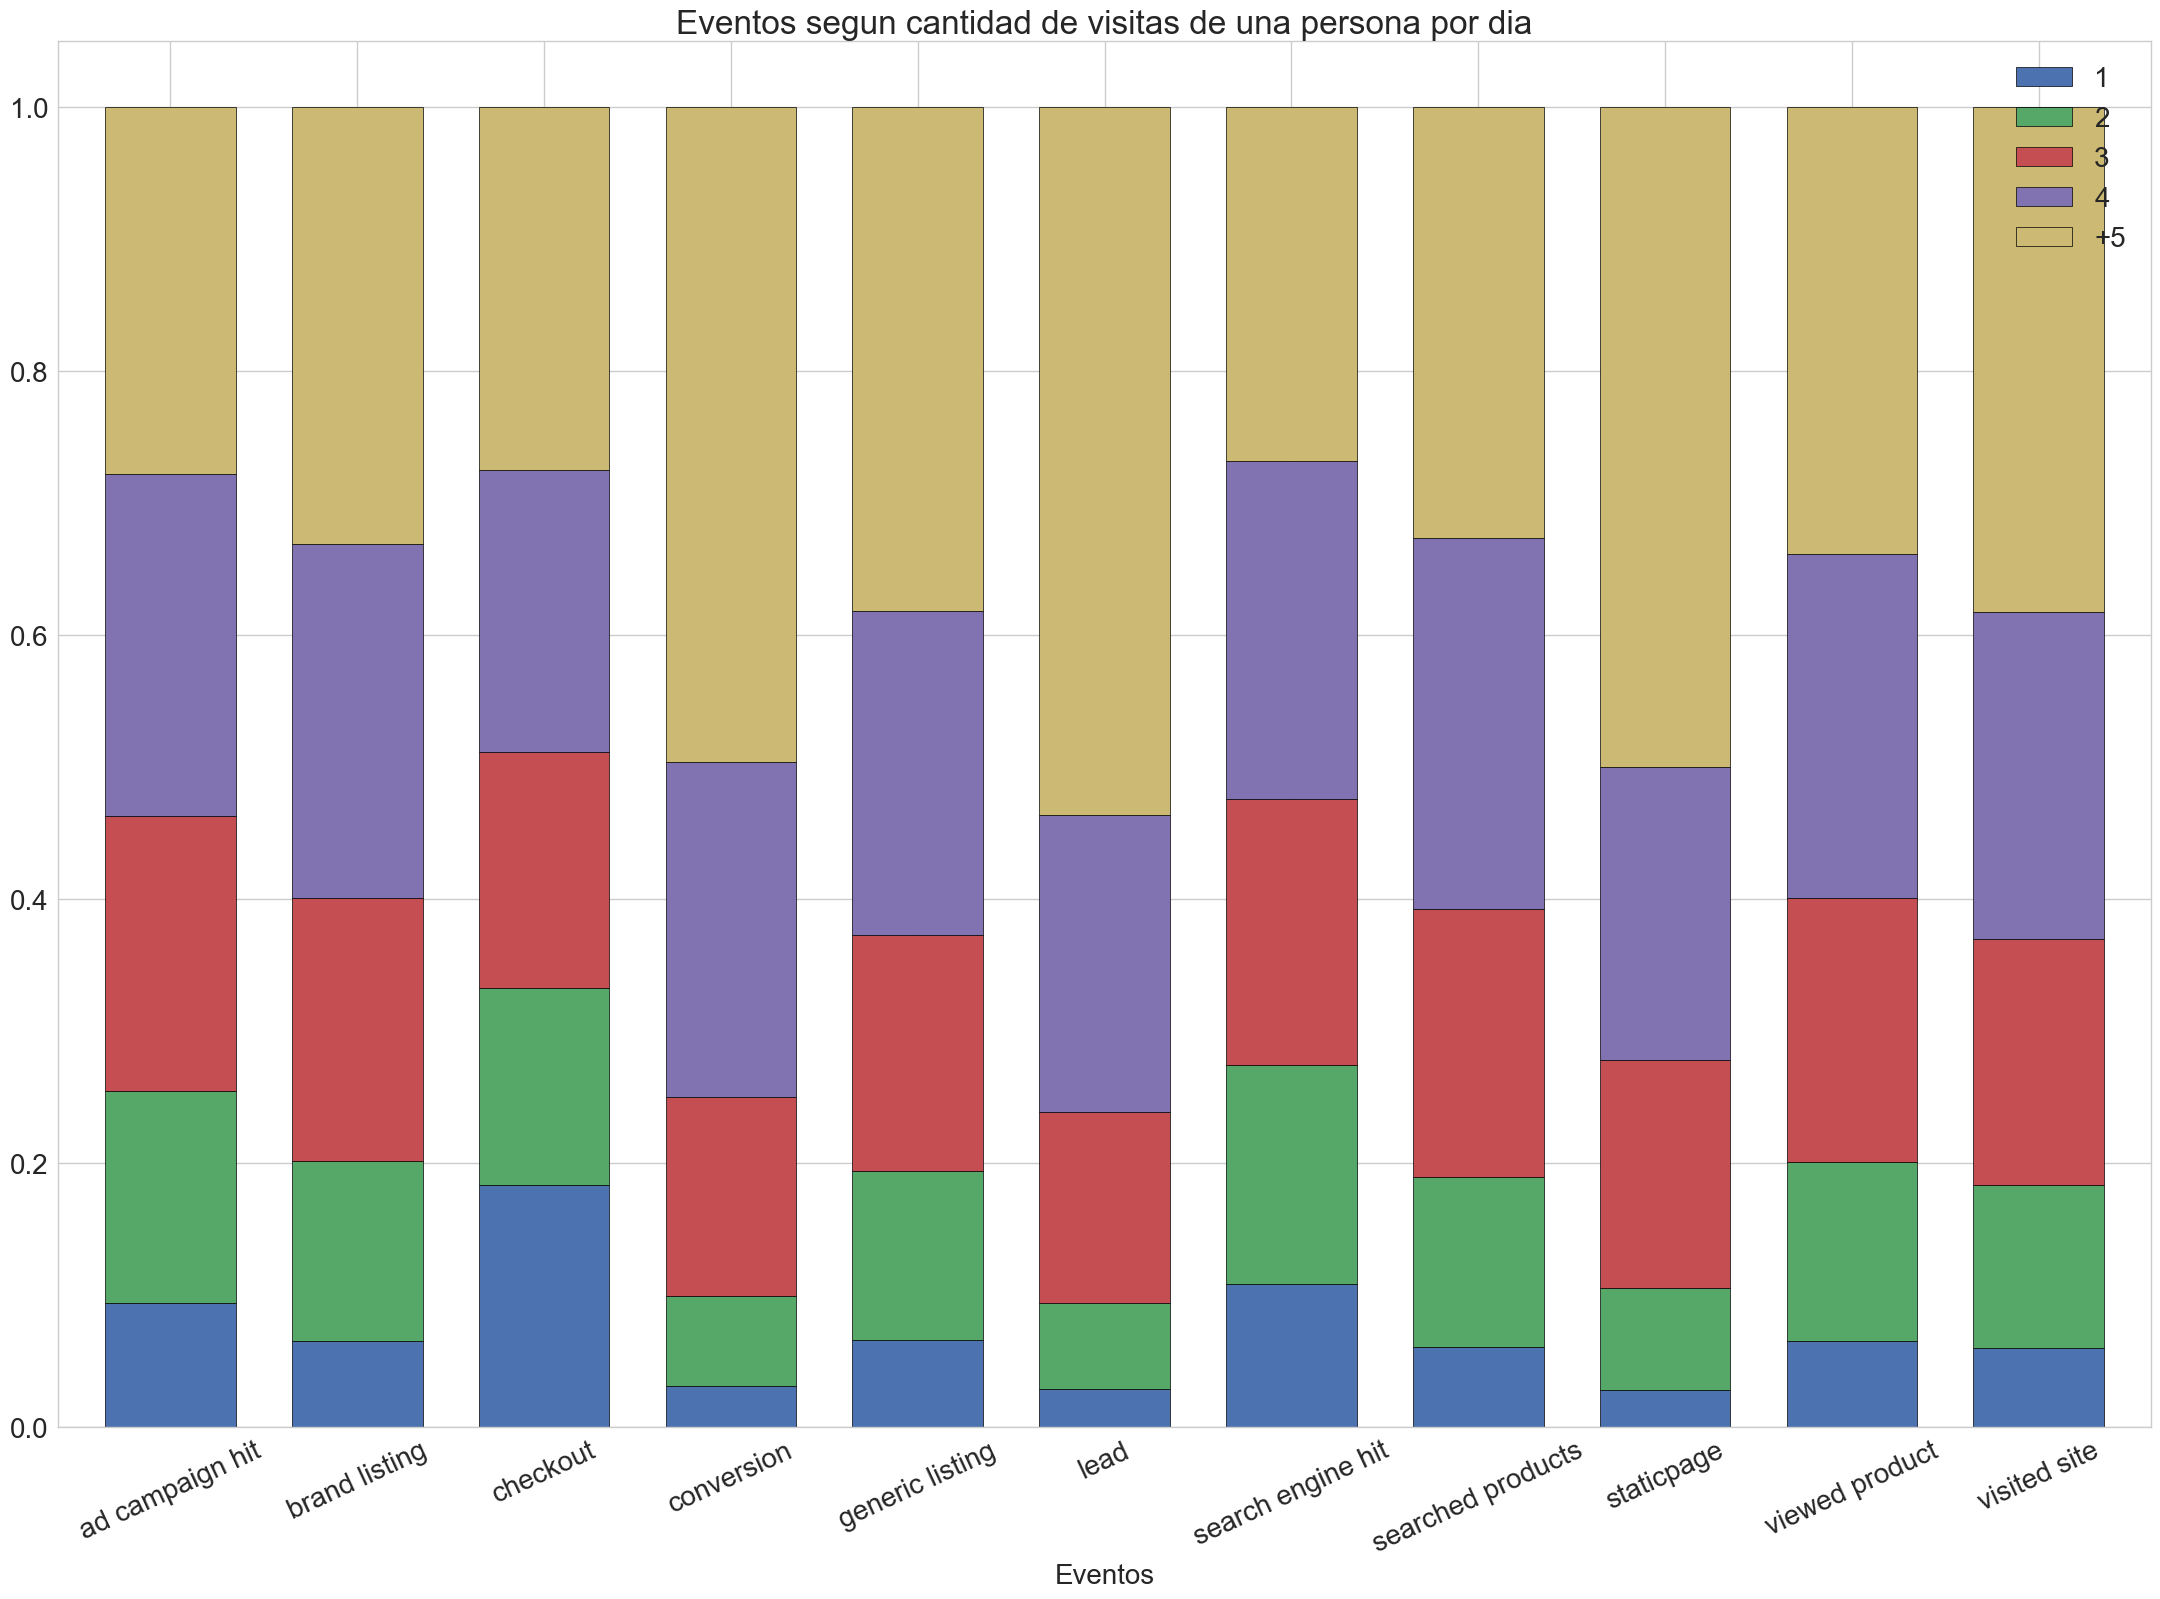

In [43]:
g4 = ct.plot(kind='bar', stacked=True,title='Eventos segun cantidad de visitas de una persona por dia', edgecolor='black', rot=25, linewidth=0.5, width=0.7, figsize=(27,18), fontsize=20)
g4.set_xlabel("Eventos",fontsize=20)
g4.title.set_size(24)
g4.legend(loc='best', prop={'size': 20})


# Comportamiento del usuario segun la cantidad de visitas por mes

Procedo de forma similar al inciso anterior, pero esta vez agrupando por cantidad de visitas por mes

In [44]:
df_visitas['just_month'] = df_visitas['timestamp'].dt.month

In [45]:
visitas_por_persona_por_dia=visitas_por_persona_por_dia.reset_index()

In [46]:
visitas_por_persona_por_dia['just_date'] = pd.to_datetime(visitas_por_persona_por_dia['just_date'])
visitas_por_persona_por_dia["just_month"] = visitas_por_persona_por_dia['just_date'].dt.month


In [47]:
visitas_por_persona_por_dia.head(25)

,person,just_date,visitas,just_month
0,0004b0a2,2018-05-31,1,5
1,0006a21a,2018-05-29,1,5
2,000a54b2,2018-04-09,1,4
3,000a54b2,2018-05-24,1,5
4,00184bf9,2018-04-06,1,4
5,00184bf9,2018-05-04,1,5
6,00184bf9,2018-05-17,1,5
7,0019c395,2018-05-17,1,5
8,001bb7eb,2018-06-06,1,6
9,001bb7eb,2018-06-08,1,6


In [48]:
visitas_por_persona_por_mes = visitas_por_persona_por_dia.groupby(["person","just_month"]).agg({'visitas':'sum'})

In [49]:
visitas_por_persona_por_mes.head(25)

visitas
person   just_month         
0004b0a2 5                 1
0006a21a 5                 1
000a54b2 4                 1
         5                 1
00184bf9 4                 1
         5                 2
0019c395 5                 1
001bb7eb 6                 2
001f1653 5                 1
00204059 1                 2
         2                 9
         3                 1
         5                 1
0020f73c 6                 1
0024a82b 5                 1
0024ad28 5                 3
00269e77 5                 1
         6                 3
0026fd72 6                 2
0027c344 6                 3
00283a9e 6                 2
002932b1 5                 4
002cecfa 5                 1
002f3084 6                 1
00300ace 5                 2

In [50]:
df_cant_visitas_mes =visitas_por_persona_por_mes["visitas"].value_counts().to_frame()

In [51]:
df_cant_visitas_mes=df_cant_visitas_mes.sort_index(axis=0)

In [52]:
df_cant_visitas_mes.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 56, 62, 63, 64, 67, 68, 69, 70, 71, 73, 76, 79, 81, 85, 90, 101, 119, 144], dtype='int64')

In [53]:
df_cant_visitas_mes=df_cant_visitas_mes.transpose()

In [54]:
df_cant_visitas_mes.transpose()

,visitas
1,21795
2,5554
3,2620
4,1532
5,1004
6,655
7,468
8,348
9,277
10,236


In [55]:
v1= [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
v2= [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,30]
v3 = [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 56] 
v4 = [62, 63, 64, 67, 68, 69, 70, 71, 73, 76, 79, 81, 85, 90, 101, 119, 144]


In [56]:
df_cant_visitas_mes['3-15']=sumar_cols(df_cant_visitas_mes,v1)
df_cant_visitas_mes['16-30']=sumar_cols(df_cant_visitas_mes,v2)
df_cant_visitas_mes['31-60']=sumar_cols(df_cant_visitas_mes,v3)
df_cant_visitas_mes['+61']=sumar_cols(df_cant_visitas_mes,v4)


In [57]:
df_cant_visitas_mes

,1,2,3-15,16-30,31-60,+61
visitas,21795,5554,7764,426,102,21


In [58]:
df_eventos_visitas_por_mes = pd.merge(visitas_por_persona_por_mes,df_visitas, on=['person','just_month'], how='inner').rename(index=str, columns={"visitas_x": "visitas"})


In [59]:
ct_mes = pd.crosstab(df_eventos_visitas_por_mes.event, df_eventos_visitas_por_mes.visitas)

In [60]:
ct_mes

visitas,1,2,3,4,5,6,7,8,9,10,11,...,70,71,73,76,79,81,85,90,101,119,144
event,,,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,23183,11962,8001,5889,4861,3716,3080,2344,2215,2255,1879,...,0,31,0,25,6,15,9,4,46,40,19
brand listing,20704,13396,9485,7310,6170,4882,4113,3059,2327,2217,2599,...,0,1,10,194,1,31,0,7,12,469,311
checkout,18981,4674,2280,1437,1010,791,554,458,332,434,326,...,2,4,2,1,3,6,8,7,18,11,2
conversion,186,101,63,76,66,51,49,38,50,48,36,...,0,0,0,1,1,1,0,0,1,5,1
generic listing,16406,9189,6236,4844,3845,2979,2533,2025,1628,1674,1418,...,56,91,96,126,0,39,1,100,88,178,246
lead,58,45,25,23,20,30,28,11,14,5,12,...,0,0,0,1,0,0,0,0,0,0,0
search engine hit,17175,8267,5355,3737,2692,2086,1581,1207,1027,1102,775,...,0,1,1,10,0,14,6,0,18,6,0
searched products,12705,7680,6193,4594,3743,3074,2130,1629,1393,1460,1257,...,9,125,92,4,0,10,44,50,5,34,53
staticpage,533,392,275,212,173,154,96,108,118,103,89,...,5,1,20,20,1,6,5,1,11,8,6


In [61]:
ct_mes['3-15']=sumar_cols(ct_mes,v1)
ct_mes['16-30']=sumar_cols(ct_mes,v2)
ct_mes['31-60']=sumar_cols(ct_mes,v3)
ct_mes['+61']=sumar_cols(ct_mes,v4)

In [62]:
ct_mes

visitas,1,2,3-15,16-30,31-60,+61
event,,,,,,
ad campaign hit,23183,11962,38691,6237,2252,502
brand listing,20704,13396,48438,10051,4066,1980
checkout,18981,4674,8455,1135,388,102
conversion,186,101,591,209,64,21
generic listing,16406,9189,31413,6393,2604,1529
lead,58,45,217,82,44,2
search engine hit,17175,8267,21923,2588,844,160
searched products,12705,7680,29449,4465,1190,584
staticpage,533,392,1631,591,317,134


In [63]:
ct_mes=ct_mes.rename(index=str, columns={"3-15": 3, "16-30":4,"31-60":5,"+61":6})
df_cant_visitas_mes=df_cant_visitas_mes.rename(index=str, columns={"3-15": 3, "16-30":4,"31-60":5,"+61":6})
porcentual(ct_mes,1,7,df_cant_visitas_mes.loc["visitas"])
ct_mes=ct_mes.round(1)

In [64]:
ct_mes

visitas,1,2,3,4,5,6
event,,,,,,
ad campaign hit,106.4,215.4,498.3,1464.1,2207.8,2390.5
brand listing,95.0,241.2,623.9,2359.4,3986.3,9428.6
checkout,87.1,84.2,108.9,266.4,380.4,485.7
conversion,0.9,1.8,7.6,49.1,62.7,100.0
generic listing,75.3,165.4,404.6,1500.7,2552.9,7281.0
lead,0.3,0.8,2.8,19.2,43.1,9.5
search engine hit,78.8,148.8,282.4,607.5,827.5,761.9
searched products,58.3,138.3,379.3,1048.1,1166.7,2781.0
staticpage,2.4,7.1,21.0,138.7,310.8,638.1


In [65]:
ct_mes=ct_mes.reset_index()
event=ct_mes["event"]
ct_mes['total']=ct_mes[1]+ct_mes[2]+ct_mes[3]+ct_mes[4]+ct_mes[5]+ct_mes[6]

In [66]:
ct_mes

visitas,event,1,2,3,4,5,6,total
0,ad campaign hit,106.4,215.4,498.3,1464.1,2207.8,2390.5,6882.5
1,brand listing,95.0,241.2,623.9,2359.4,3986.3,9428.6,16734.4
2,checkout,87.1,84.2,108.9,266.4,380.4,485.7,1412.7
3,conversion,0.9,1.8,7.6,49.1,62.7,100.0,222.1
4,generic listing,75.3,165.4,404.6,1500.7,2552.9,7281.0,11979.9
5,lead,0.3,0.8,2.8,19.2,43.1,9.5,75.7
6,search engine hit,78.8,148.8,282.4,607.5,827.5,761.9,2706.9
7,searched products,58.3,138.3,379.3,1048.1,1166.7,2781.0,5571.7
8,staticpage,2.4,7.1,21.0,138.7,310.8,638.1,1118.1
9,viewed product,545.8,1251.3,3440.5,11088.7,19669.6,28871.4,64867.3


In [67]:
ct_mes.index=[0,1,2,3,4,5,6,7,8,9,10]
ct_mes=ct_mes.drop(["event"],axis=1)
normalizar_filas(ct_mes,0,11,1,7)
ct_mes.index=event
ct_mes=ct_mes.drop(["total"],axis=1)


In [68]:
ct_mes=ct_mes.rename(index=str, columns={3: "3-15", 4:"16-30",5:"31-60",6:"+61"})

In [69]:
ct_mes

visitas,1,2,3-15,16-30,31-60,+61
event,,,,,,
ad campaign hit,0.015459,0.031297,0.072401,0.212728,0.320785,0.347330
brand listing,0.005677,0.014413,0.037282,0.140991,0.238210,0.563426
checkout,0.061655,0.059602,0.077086,0.188575,0.269272,0.343810
conversion,0.004052,0.008104,0.034219,0.221072,0.282305,0.450248
generic listing,0.006286,0.013806,0.033773,0.125268,0.213099,0.607768
lead,0.003963,0.010568,0.036988,0.253633,0.569353,0.125495
search engine hit,0.029111,0.054971,0.104326,0.224426,0.305700,0.281466
searched products,0.010464,0.024822,0.068076,0.188111,0.209397,0.499130
staticpage,0.002146,0.006350,0.018782,0.124050,0.277972,0.570700


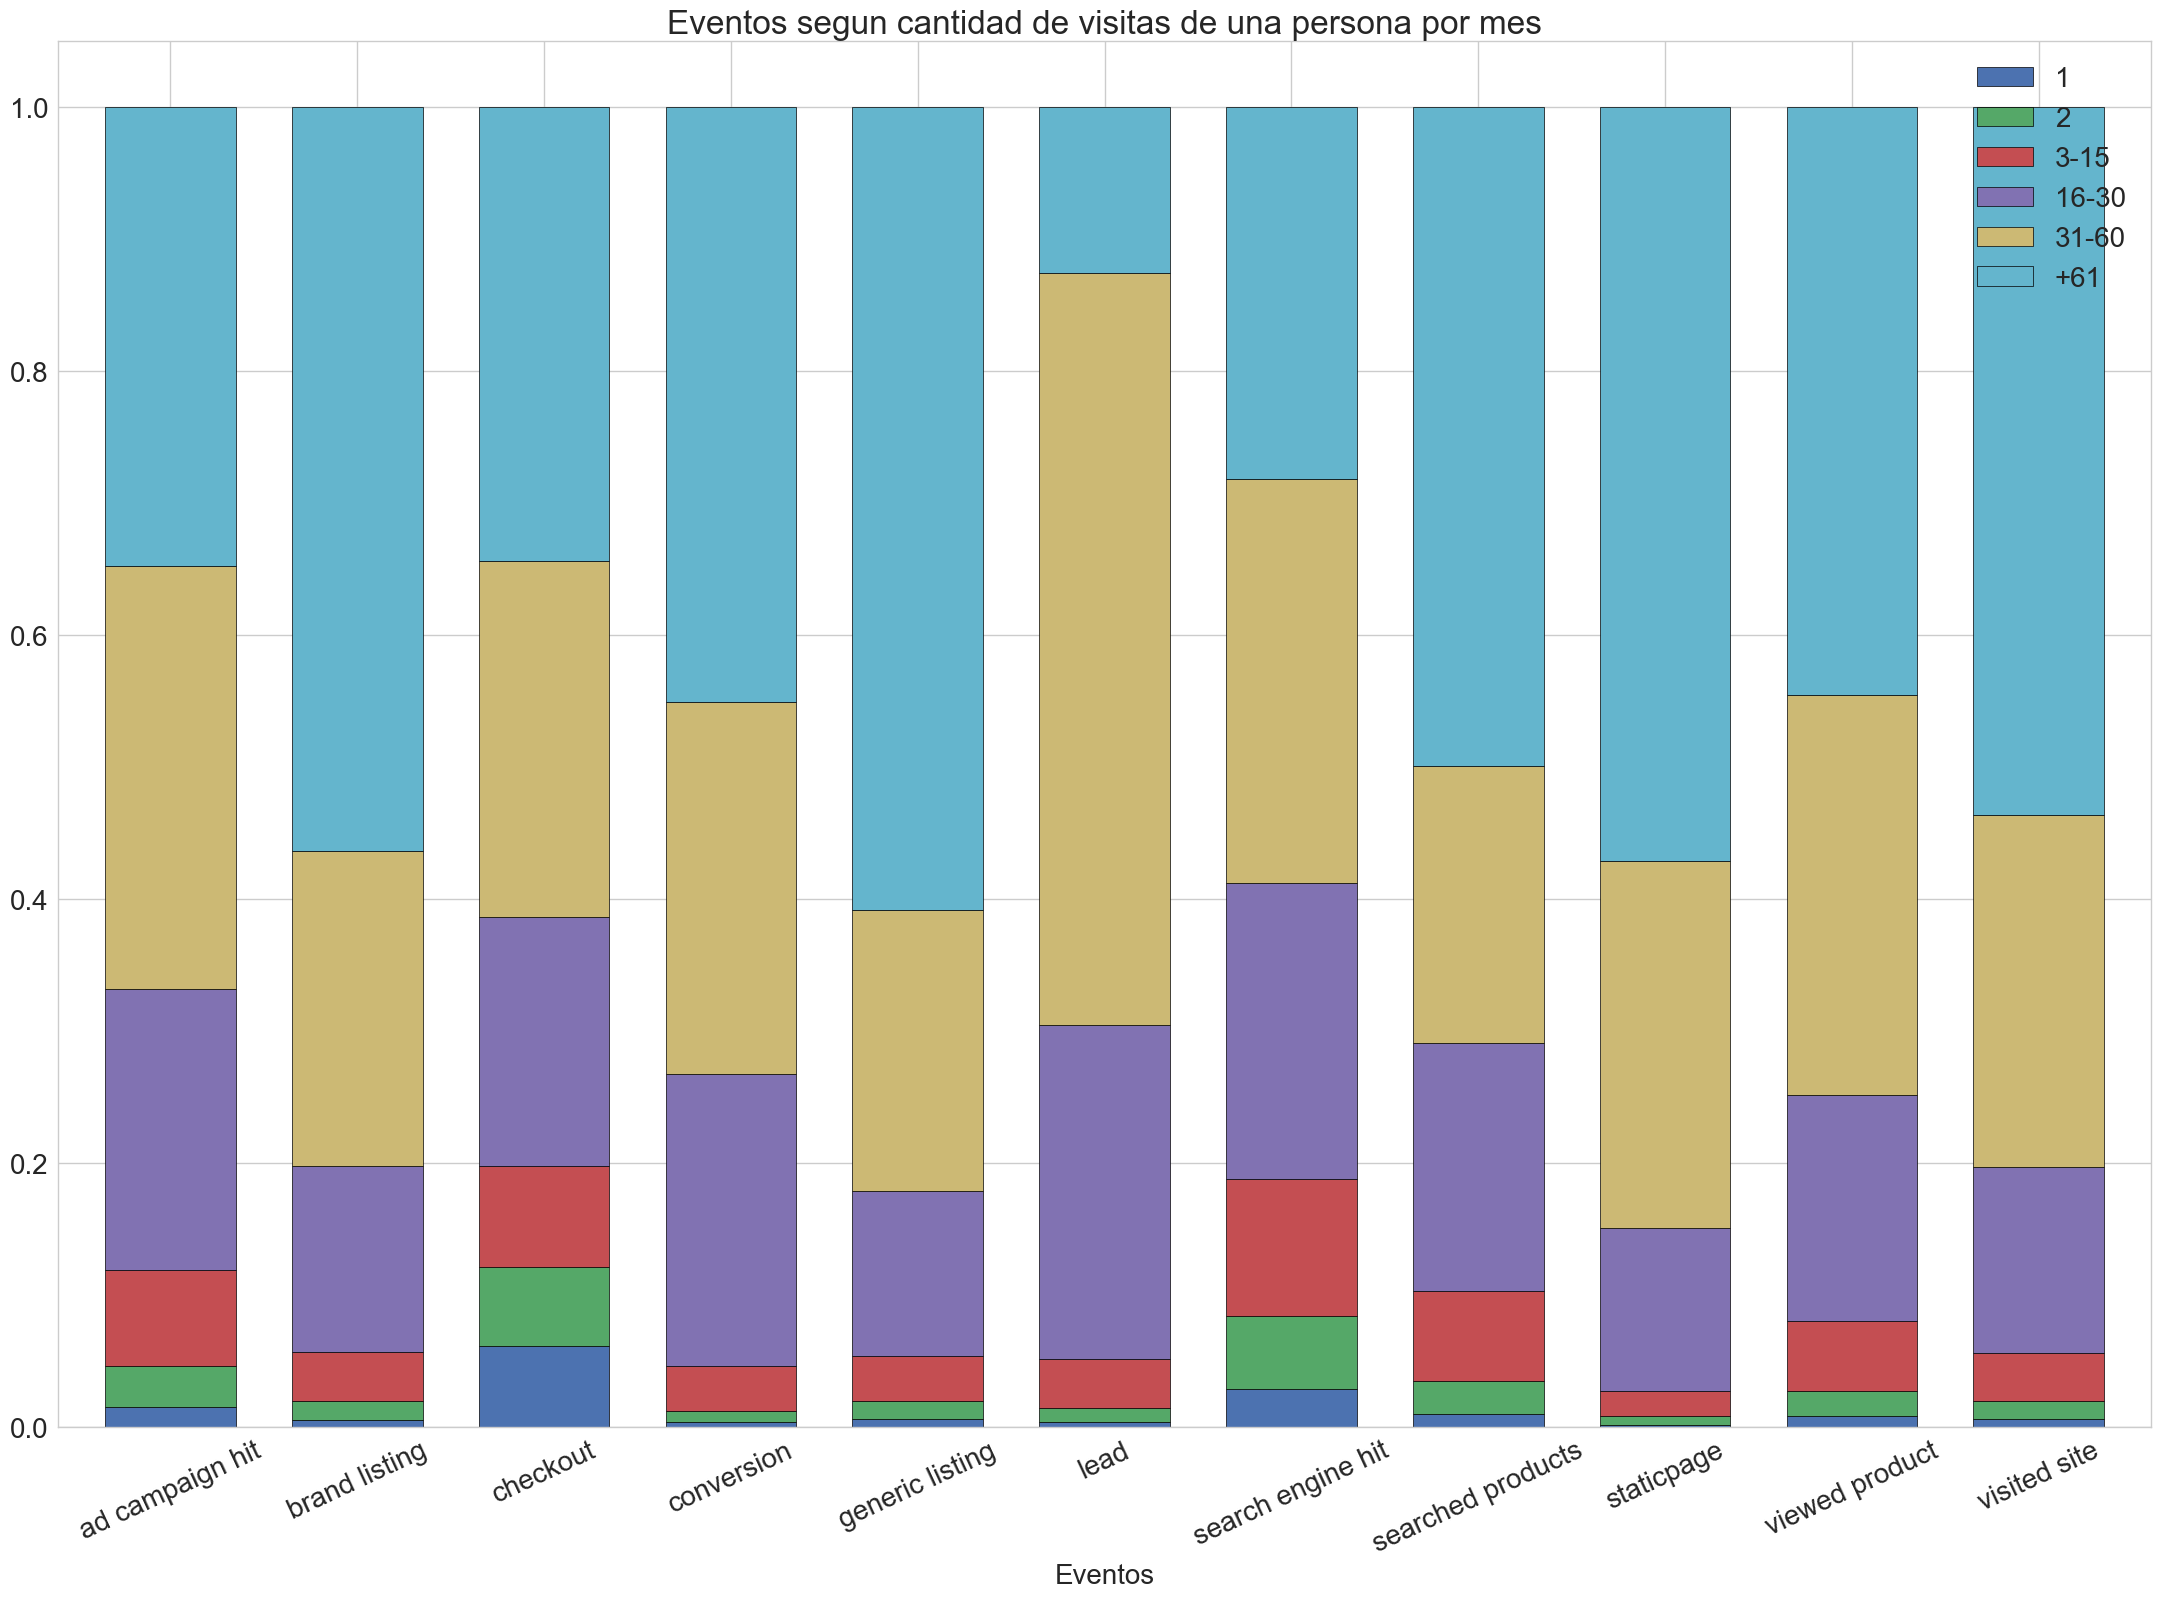

In [70]:
g5 = ct_mes.plot(kind='bar', stacked=True,title='Eventos segun cantidad de visitas de una persona por mes', edgecolor='black', rot=25, linewidth=0.5, width=0.7, figsize=(27,18), fontsize=20)
g5.set_xlabel("Eventos",fontsize=20)
g5.title.set_size(24)
g5.legend(loc='best', prop={'size': 20})


# Tiempo de permanencia de un usuario en la página


Me quedo solo con las columnas que son de interés para este análisis

In [71]:
df_tiempos=  df[['timestamp','person']]
df_tiempos['timestamp'] = pd.to_datetime(df_tiempos['timestamp'])
df_tiempos= df_tiempos.sort_values(by=["timestamp"])
df_tiempos['just_date'] = df_tiempos['timestamp'].dt.date
df_tiempos.reset_index(drop = True, inplace = True)

Agrego la columna **'diff'** que me indica _diferencia de tiempo entre los distintos eventos temporales **por usuario**_

In [72]:
df_tiempos['diff'] = df_tiempos.groupby(['person'])['timestamp'].diff()

Paso la columna a string para detectar los valores "NaT" que indican el ingreso de un nuevo usuario 

In [73]:
df_tiempos['diff'] = df_tiempos['diff'].astype(str)
df_tiempos['new_user'] = df_tiempos['diff'] =='NaT'

Agrego la columna **'diff2'** que me indica la _diferencia entre eventos temporales_ (sin importar el usuario)

In [74]:
df_tiempos['diff2'] = (df_tiempos['timestamp'] - (df_tiempos['timestamp'].shift())) / np.timedelta64(1, 'h')

Reasigno la columna **'diff'** para volver a tener datos de tipo temporal y elimina los nulos

In [75]:
df_tiempos['diff'] = df_tiempos.groupby(['person'])['timestamp'].diff()

Lleno con 0s todos los nulos del data frame

In [76]:
df_tiempos=df_tiempos.fillna(0)

Identifico en la columna **'new_session_same_user'** los _comienzos de nuevas sesiones del mismo usuario_. Para ello se tiene en cuenta un umbral de 0.48 horas. Es decir, se considera que si el tiempo entre eventos es mayor a 0.48 horas, el evento corresponde a una nueva sesion del mismo usuario. En el informe adjunto se explica detalladamente la elección de este umbral.

In [77]:
df_tiempos['new_session_same_user'] = df_tiempos['diff2'] > 0.48

Identifico en la columna **'new_session_new_user'** los comienzos de _nuevas sesiones de un usuario nuevo._ Se tiene en cuenta el mismo umbral que antes. 

In [78]:
df_tiempos["diff"]=df_tiempos["diff"]/np.timedelta64(1, 'h')
df_tiempos["new_session_new_user"] = df_tiempos["diff"] > 0.48

Para contabilizar las sesiones nuevas (que pueden corresponder al mismo usuario o a un nuevo usuario) se realiza la operacion OR entre las columnas con datos booleanos calculadas previamente.

In [79]:
df_tiempos["new_session"]=df_tiempos["new_user"]|df_tiempos["new_session_same_user"]|df_tiempos["new_session_new_user"]

Enumero las sesiones para luego separarlas por agrupación

In [80]:
df_tiempos['sessionid'] = df_tiempos['new_session'].cumsum()

Como pusimos un umbral de 0.48 horas para la finalizacion de las sesiones, elimino de la columa **'diff'** los valores que superen ese valor (Me quedo solo con los False de la columna new_sesion). Estos valores se corresponderan al primer 'diff' de cada sesion, que debería ser siempre nulo.

In [81]:
df_tiempos=df_tiempos[df_tiempos.new_session==False]

Ahora si agrupo por **sessionid** y obtengo la información buscada

In [82]:
tiempos_sesiones=df_tiempos.groupby(["sessionid"]).agg({'diff':'sum'})

In [83]:
tiempos_sesiones.describe()

,diff
count,86643.000000
mean,0.123062
std,0.177535
min,0.000000
25%,0.010278
50%,0.050833
75%,0.161111
max,2.323889


In [84]:
df_tiempos["sessionid"].max()

89071

Es importante notar que el index de **session_id** nos indica que debemos tener 89071 sesiones, mientras que la cantidad de filas de 'tiempos_sesiones' es 86643, por lo que evidentemente hemos eliminado sesiones de evento único y duración nula, volvemos a agregarlas para que nuestro promedio no se vea afectado:

In [85]:
for i in range(86643,89071):
    tiempos_sesiones = tiempos_sesiones.append({'diff': 0}, ignore_index=True)

In [86]:
tiempos_sesiones.describe()

,diff
count,89071.000000
mean,0.119708
std,0.176241
min,0.000000
25%,0.008333
50%,0.047500
75%,0.155833
max,2.323889


<Figure size 640x480 with 0 Axes>

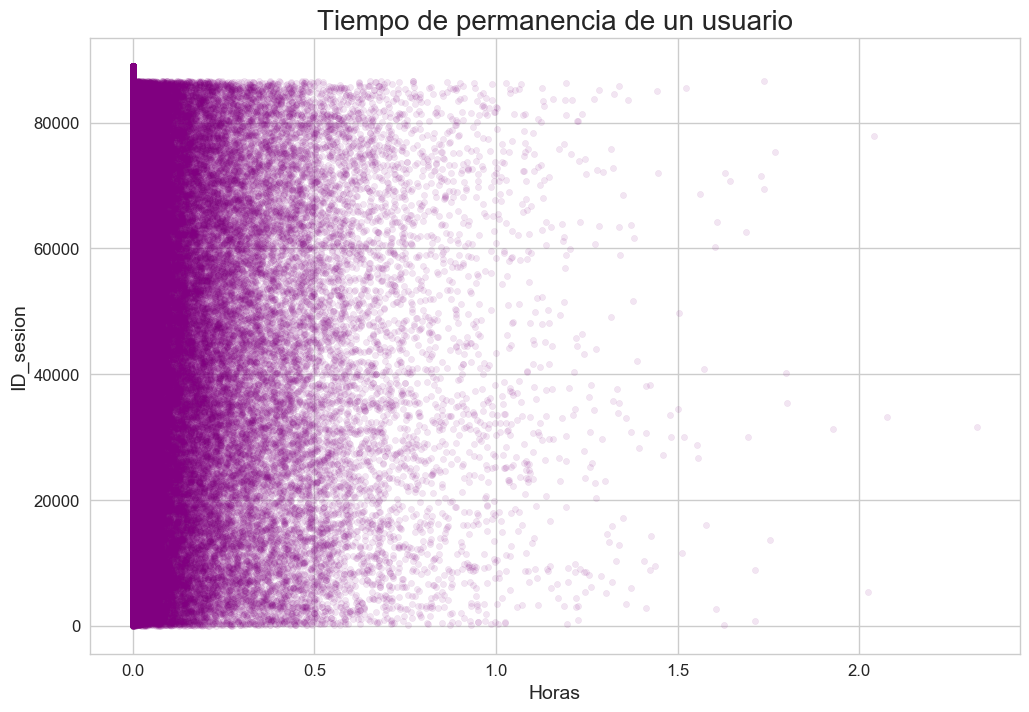

In [87]:
plt.figure()
g= tiempos_sesiones.reset_index().plot(kind='scatter', y='index', x='diff',alpha=0.1,figsize=(12,8),color='purple',title='Tiempo de permanencia de un usuario',legend=False,fontsize=12)


g.set_xlabel("Horas",fontsize=14)
g.set_ylabel("ID_sesion",fontsize=14)
g.title.set_size(20)


# Tasa de rebote

Consideramos un tiempo de sesion satisfactorio de 30 segundos. Por lo tanto, calcularemos la tasa de rebote para aquellas sesiones menores a este lapso de tiempo. 30 seg = 0.00833 horas

In [88]:
tiempos_sesiones["menor_a_30_seg"] = tiempos_sesiones["diff"] < 0.00833

In [89]:
tiempos_sesiones.head(10)

,diff,menor_a_30_seg
0,0.000000,True
1,0.000556,True
2,0.074722,False
3,0.000000,True
4,0.000000,True
5,0.077778,False
6,0.031667,False
7,0.000556,True
8,0.003056,True
9,0.104444,False


In [90]:
tiempos_sesiones["menor_a_30_seg"].value_counts()

False    66825
True     22246
Name: menor_a_30_seg, dtype: int64

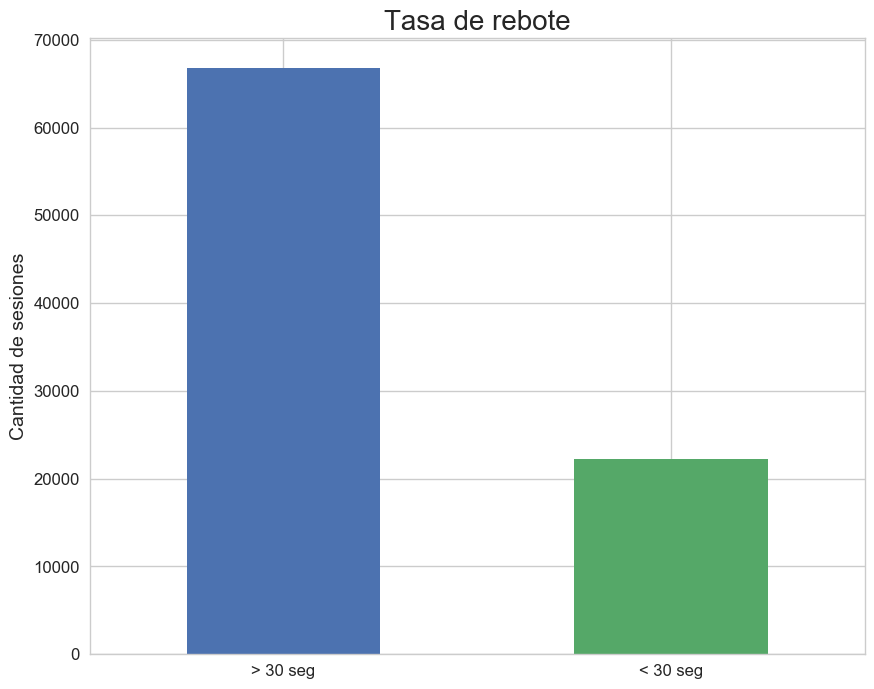

In [91]:
plt.figure()
g2=tiempos_sesiones["menor_a_30_seg"].value_counts().plot(kind='bar',figsize=(10,8),rot=0,title='Tasa de rebote',legend=False,fontsize=12)

g2.set_ylabel("Cantidad de sesiones",fontsize=14)
x_lab=['> 30 seg','< 30 seg']
g2.set_xticklabels(x_lab)
g2.title.set_size(20)


## Operating System durante los meses

In [92]:
df_osv = df.loc[df['operating_system_version'].notnull(), : ]
person_osv = df_osv[['person', ]]
df_osv = df_osv[['timestamp', 'operating_system_version','person']]
df_osv.head()
os = df_osv['operating_system_version'].value_counts()
s_os = os.nlargest(10)
os.describe()
os.head()
df_osv.describe()

,timestamp,operating_system_version,person
count,87378,87378,87378
unique,86556,121,26899
top,2018-06-05 14:23:13,Windows 7,6b07be7b
freq,3,19675,263


Obtenemos todos los usuarios que tienen algun tipo OS

In [93]:
os_per = df_osv.groupby('person')['operating_system_version'].nunique().value_counts()
os_per

1    25787
2      926
3      147
4       30
5        7
7        1
6        1
Name: operating_system_version, dtype: int64

In [94]:
person_osv.describe()

,person
count,87378
unique,26899
top,6b07be7b
freq,263


In [95]:
df_windows = df_osv.loc[df_osv['operating_system_version'].str.contains('Windows')]
df_ios = df_osv.loc[df_osv['operating_system_version'].str.contains('iOS')]
df_android = df_osv.loc[df_osv['operating_system_version'].str.contains('Android')]
df_mac = df_osv.loc[df_osv['operating_system_version'].str.contains('Mac')]
df_linux = df_osv.loc[df_osv['operating_system_version'].str.contains('Linux')]

df_windows['OS'] = 'Windows'
df_ios['OS'] = 'iOS'
df_android['OS'] = 'Android'
df_mac['OS'] = 'Mac'
df_linux

df_windows = df_windows[['timestamp','OS','person']]
df_ios = df_ios[['timestamp','OS','person']]
df_android = df_android[['timestamp','OS','person']]
df_mac = df_mac[['timestamp','OS','person']]




frames = [df_windows, df_ios, df_android, df_mac]
df_os = pd.concat(frames)

Separamos los operating system en las 4 categorias mas comunes hoy en dia (Android, Windows , iOS , OSx)

In [96]:
df_os['date'] = pd.to_datetime(df_os['timestamp'])
df_os['month'] = df_os['date'].dt.month
ct = pd.crosstab(df_os.month, df_os.OS)
ct.head(10)
ct


OS,Android,Mac,Windows,iOS
month,,,,
1,1055,1,959,117
2,1368,12,1304,99
3,3384,42,3515,286
4,5782,66,6324,411
5,18872,175,19177,1658
6,10949,110,10216,968


Text(72.7222,0.5,'Mes')

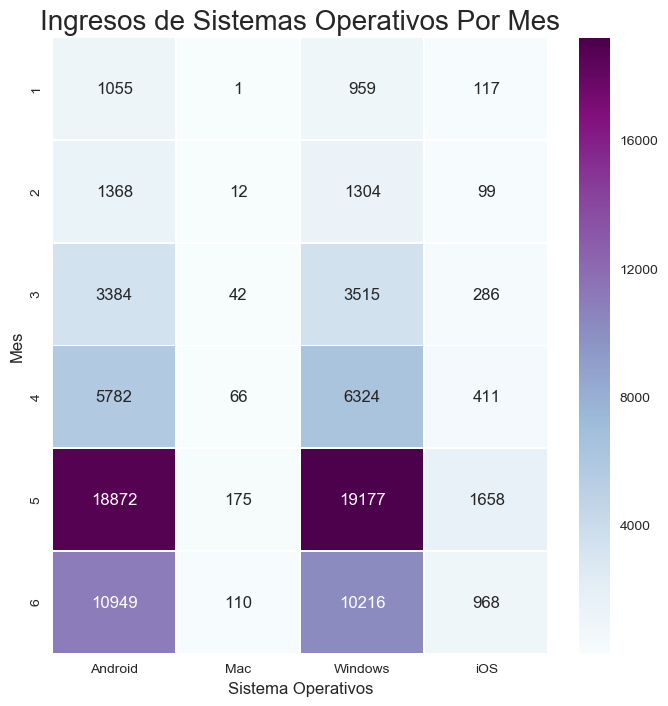

In [97]:
plt.subplots(figsize=(8,8))
grafico_dia_mes=sns.heatmap(ct,linewidths=.5,fmt="d",annot=True,cmap="BuPu")
grafico_dia_mes.set_title("Ingresos de Sistemas Operativos Por Mes",fontsize=20)
grafico_dia_mes.set_xlabel("Sistema Operativos",fontsize=12)
grafico_dia_mes.set_ylabel("Mes",fontsize=12)

Obtuvimos que el gran flujo de usuarios es proveniente de usuarios de Windows y Android 

Text(0,0.5,'Frecuencia')

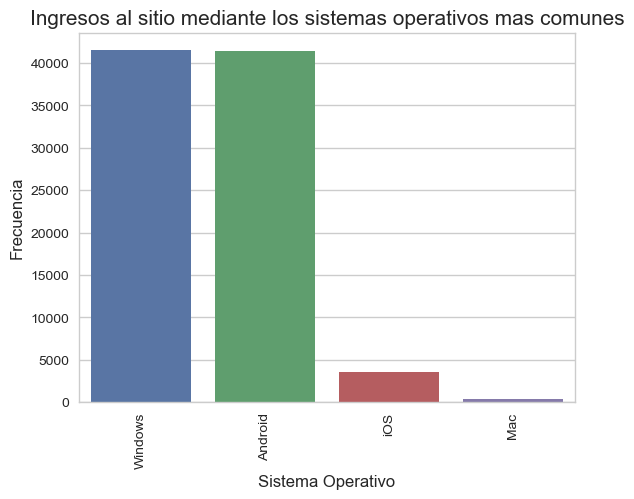

In [98]:
df_os['OS'].value_counts()
g = sns.barplot(x=df_os['OS'].value_counts().index, y=df_os['OS'].value_counts().values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Ingresos al sitio mediante los sistemas operativos mas comunes", fontsize = 15)
g.set_xlabel("Sistema Operativo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

## Android

In [99]:
df_android_full= df[df['person'].isin(df_android['person'])]
df_android_viewed = df_android_full[df_android_full['event'] == 'viewed product']
top_10_models_viewed_android = df_android_viewed['model'].value_counts().head(10)
top_10_models_viewed_android


iPhone 6                  19007
iPhone 5s                 17182
iPhone 6S                 15611
Samsung Galaxy S7 Edge     9149
iPhone 7                   7820
Samsung Galaxy S7          6844
iPhone SE                  6256
iPhone 7 Plus              6100
Samsung Galaxy J5          5737
iPhone 6S Plus             5263
Name: model, dtype: int64

Text(0,0.5,'Frecuencia')

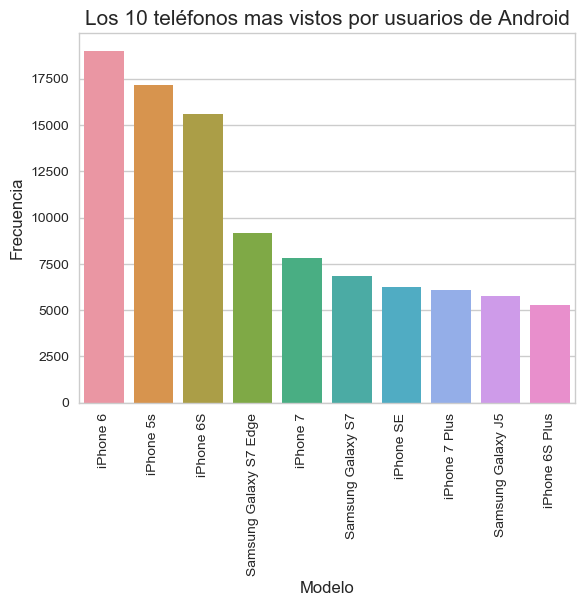

In [100]:
g = sns.barplot(x=top_10_models_viewed_android.index, y=top_10_models_viewed_android.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas vistos por usuarios de Android", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

Obtenemos los modelos mas vistos por usuarios Android

In [101]:

df_android_conversion = df_android_full[df_android_full['event'] == 'conversion']
top_10_models_bought_android = df_android_conversion['model'].value_counts().head(10)
top_10_models_bought_android


iPhone 5s                            48
Samsung Galaxy J5                    45
iPhone 6                             38
Samsung Galaxy J7                    17
Samsung Galaxy Gran Prime Duos TV    17
Motorola Moto G4 Plus                16
Samsung Galaxy S6 Flat               15
Samsung Galaxy A5                    15
iPhone 5c                            15
Samsung Galaxy Note 4                14
Name: model, dtype: int64

Text(0,0.5,'Frecuencia')

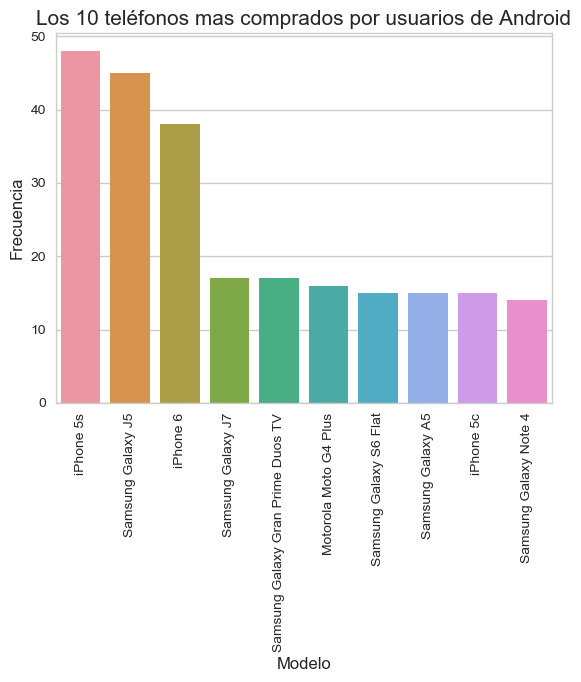

In [102]:
g = sns.barplot(x=top_10_models_bought_android.index, y=top_10_models_bought_android.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas comprados por usuarios de Android", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

Vemos que estos usuarios tienen un aumento de los

## Windows

In [103]:
df_windows_full= df[df['person'].isin(df_windows['person'])]
df_windows_viewed = df_windows_full[df_windows_full['event'] == 'viewed product']
top_10_models_viewed_windows = df_windows_viewed['model'].value_counts().head(10)

Text(0,0.5,'Frecuencia')

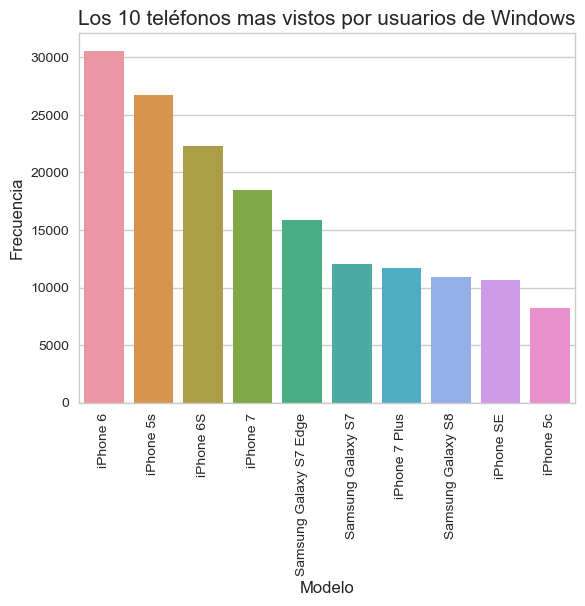

In [104]:
g = sns.barplot(x=top_10_models_viewed_windows.index, y=top_10_models_viewed_windows.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas vistos por usuarios de Windows", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

In [105]:
df_windows_conversion = df_windows_full[df_windows_full['event'] == 'conversion']
top_10_models_bought_windows = df_windows_conversion['model'].value_counts().head(10)
top_10_models_bought_windows


Samsung Galaxy J5         60
iPhone 5s                 43
iPhone 6                  40
iPhone 6S                 28
Motorola Moto G3 4G       24
Samsung Galaxy S6 Flat    24
Motorola Moto G4 Plus     21
iPhone 5c                 21
Samsung Galaxy Note 4     18
Samsung Galaxy J7         18
Name: model, dtype: int64

Text(0,0.5,'Frecuencia')

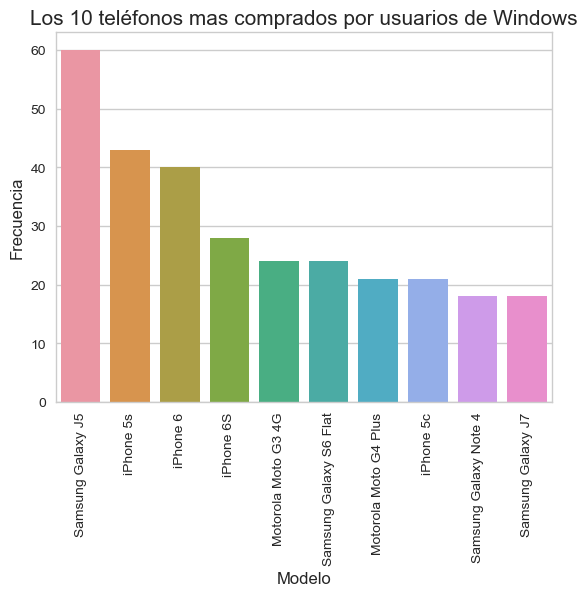

In [106]:
g = sns.barplot(x=top_10_models_bought_windows.index, y=top_10_models_bought_windows.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas comprados por usuarios de Windows", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

## iOS

In [107]:
df_iOS_full= df[df['person'].isin(df_ios['person'])]
df_iOS_viewed = df_iOS_full[df_iOS_full['event'] == 'viewed product']
top_10_models_viewed_iOS = df_iOS_viewed['model'].value_counts().head(10)

Text(0,0.5,'Frecuencia')

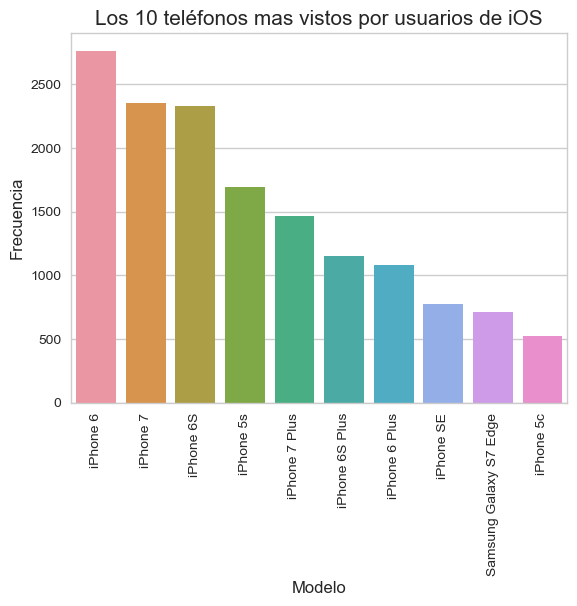

In [108]:
g = sns.barplot(x=top_10_models_viewed_iOS.index, y=top_10_models_viewed_iOS.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas vistos por usuarios de iOS", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

In [109]:
df_iOS_conversion = df_iOS_full[df_iOS_full['event'] == 'conversion']
top_10_models_bought_iOS = df_iOS_conversion['model'].value_counts().head(10)
top_10_models_bought_iOS


iPhone 6                      15
iPhone 5s                     12
iPhone 5c                      8
iPhone 6S                      8
iPhone 7                       6
Samsung Galaxy S7 Edge         4
Samsung Galaxy Core 2 Duos     3
iPhone SE                      3
Samsung Galaxy S3 Mini         2
iPhone 5                       2
Name: model, dtype: int64

Text(0,0.5,'Frecuencia')

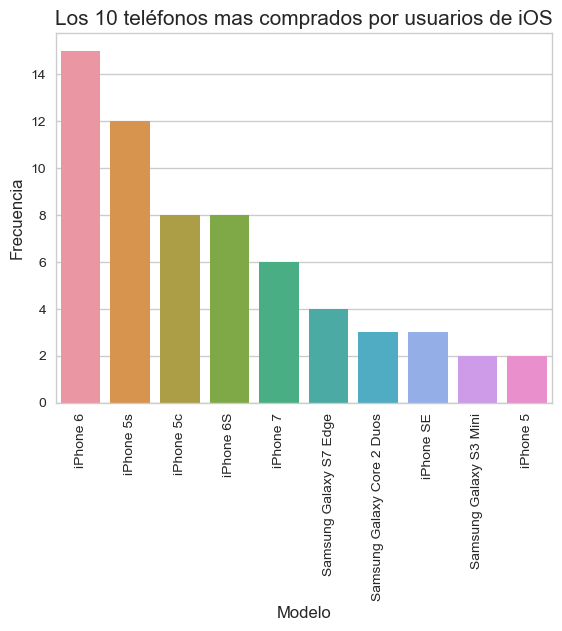

In [110]:
g = sns.barplot(x=top_10_models_bought_iOS.index, y=top_10_models_bought_iOS.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas comprados por usuarios de iOS", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

In [114]:
## Operating System durante los meses

df_osv = df.loc[df['operating_system_version'].notnull(), : ]
person_osv = df_osv[['person', ]]
df_osv = df_osv[['timestamp', 'operating_system_version','person']]
df_osv.head()
os = df_osv['operating_system_version'].value_counts()
s_os = os.nlargest(10)
os.describe()
os.head()
df_osv.describe()

#Obtenemos todos los usuarios que tienen algun tipo OS

os_per = df_osv.groupby('person')['operating_system_version'].nunique().value_counts()
os_per

person_osv.describe()

df_windows = df_osv.loc[df_osv['operating_system_version'].str.contains('Windows')]
df_ios = df_osv.loc[df_osv['operating_system_version'].str.contains('iOS')]
df_android = df_osv.loc[df_osv['operating_system_version'].str.contains('Android')]
df_mac = df_osv.loc[df_osv['operating_system_version'].str.contains('Mac')]
df_linux = df_osv.loc[df_osv['operating_system_version'].str.contains('Linux')]

df_windows['OS'] = 'Windows'
df_ios['OS'] = 'iOS'
df_android['OS'] = 'Android'
df_mac['OS'] = 'Mac'
df_linux

df_windows = df_windows[['timestamp','OS','person']]
df_ios = df_ios[['timestamp','OS','person']]
df_android = df_android[['timestamp','OS','person']]
df_mac = df_mac[['timestamp','OS','person']]




frames = [df_windows, df_ios, df_android, df_mac]
df_os = pd.concat(frames)

#Separamos los operating system en las 4 categorias mas comunes hoy en dia (Android, Windows , iOS , OSx)

df_os['date'] = pd.to_datetime(df_os['timestamp'])
df_os['month'] = df_os['date'].dt.month
ct = pd.crosstab(df_os.month, df_os.OS)
ct.head(10)
ct

OS,Android,Mac,Windows,iOS
month,,,,
1,1055,1,959,117
2,1368,12,1304,99
3,3384,42,3515,286
4,5782,66,6324,411
5,18872,175,19177,1658
6,10949,110,10216,968


Text(72.7222,0.5,'Mes')

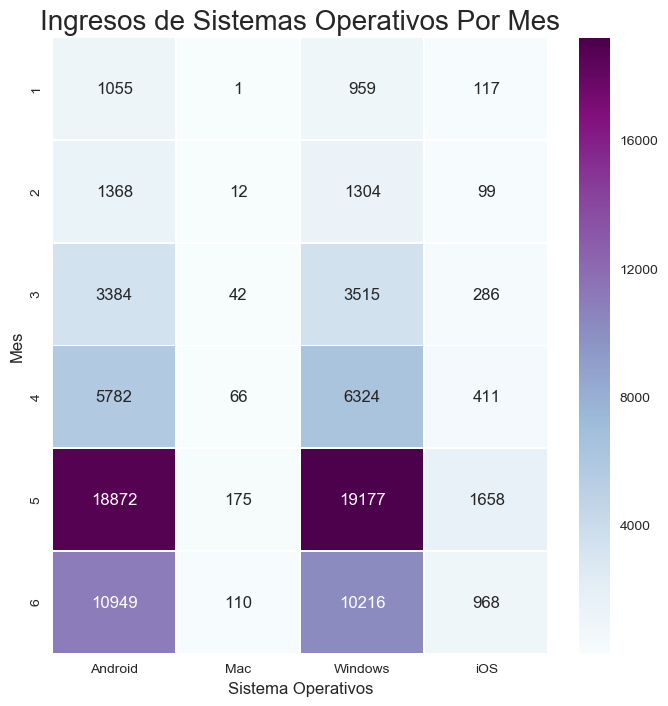

In [115]:
plt.subplots(figsize=(8,8))
grafico_dia_mes=sns.heatmap(ct,linewidths=.5,fmt="d",annot=True,cmap="BuPu")
grafico_dia_mes.set_title("Ingresos de Sistemas Operativos Por Mes",fontsize=20)
grafico_dia_mes.set_xlabel("Sistema Operativos",fontsize=12)
grafico_dia_mes.set_ylabel("Mes",fontsize=12)

Text(0,0.5,'Frecuencia')

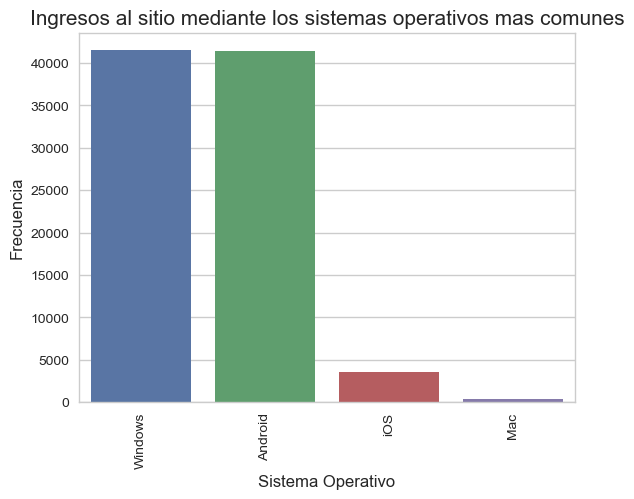

In [116]:
#Obtuvimos que el gran flujo de usuarios es proveniente de usuarios de Windows y Android 

df_os['OS'].value_counts()
g = sns.barplot(x=df_os['OS'].value_counts().index, y=df_os['OS'].value_counts().values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Ingresos al sitio mediante los sistemas operativos mas comunes", fontsize = 15)
g.set_xlabel("Sistema Operativo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

Text(0,0.5,'Frecuencia')

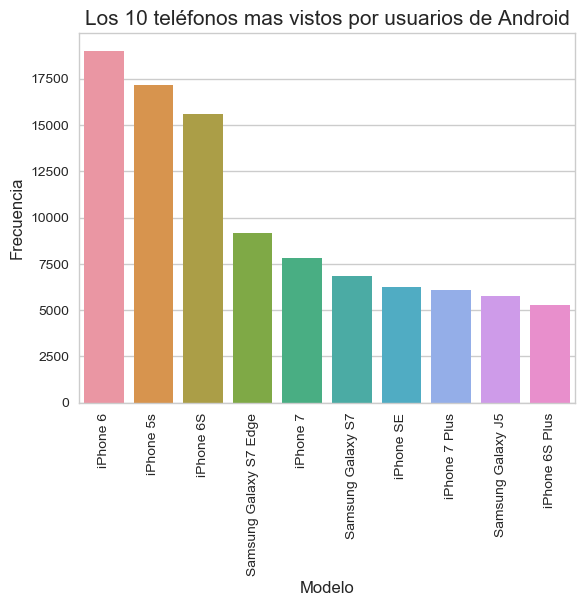

In [117]:
## Android

df_android_full= df[df['person'].isin(df_android['person'])]
df_android_viewed = df_android_full[df_android_full['event'] == 'viewed product']
top_10_models_viewed_android = df_android_viewed['model'].value_counts().head(10)
top_10_models_viewed_android


g = sns.barplot(x=top_10_models_viewed_android.index, y=top_10_models_viewed_android.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas vistos por usuarios de Android", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

Text(0,0.5,'Frecuencia')

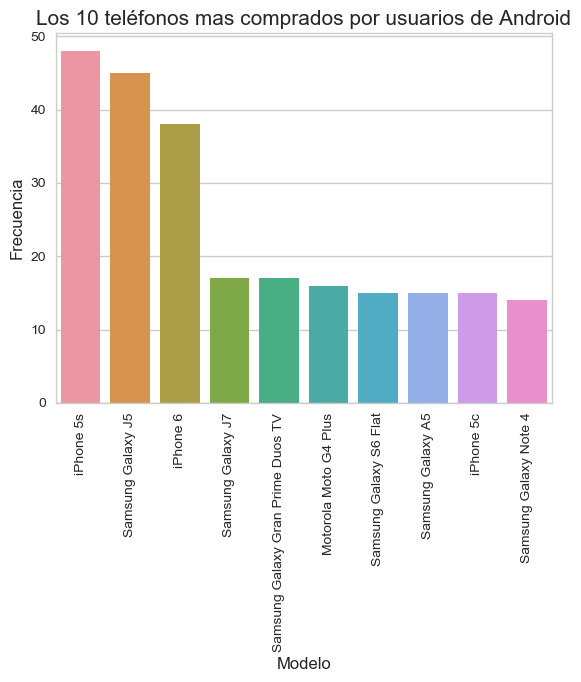

In [118]:
#Obtenemos los modelos mas vistos por usuarios Android


df_android_conversion = df_android_full[df_android_full['event'] == 'conversion']
top_10_models_bought_android = df_android_conversion['model'].value_counts().head(10)
top_10_models_bought_android


g = sns.barplot(x=top_10_models_bought_android.index, y=top_10_models_bought_android.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas comprados por usuarios de Android", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)


Text(0,0.5,'Frecuencia')

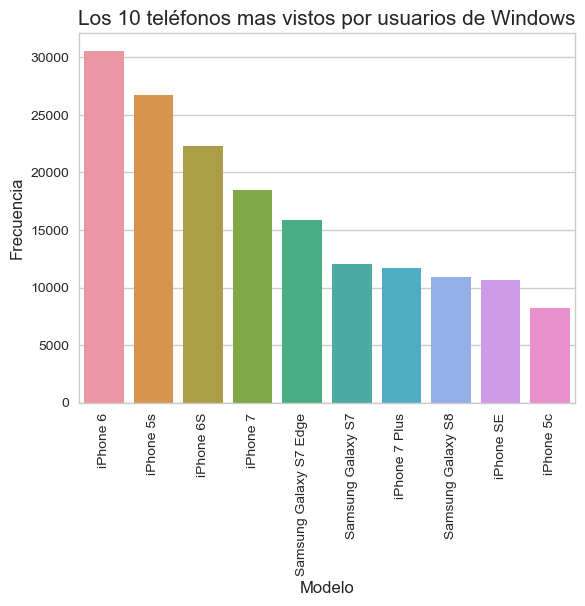

In [119]:
## Windows

df_windows_full= df[df['person'].isin(df_windows['person'])]
df_windows_viewed = df_windows_full[df_windows_full['event'] == 'viewed product']
top_10_models_viewed_windows = df_windows_viewed['model'].value_counts().head(10)

g = sns.barplot(x=top_10_models_viewed_windows.index, y=top_10_models_viewed_windows.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas vistos por usuarios de Windows", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

Text(0,0.5,'Frecuencia')

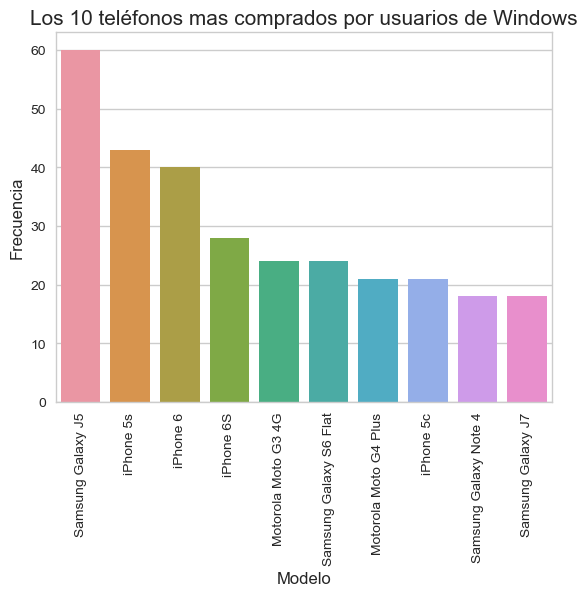

In [121]:
df_windows_conversion = df_windows_full[df_windows_full['event'] == 'conversion']
top_10_models_bought_windows = df_windows_conversion['model'].value_counts().head(10)
top_10_models_bought_windows


g = sns.barplot(x=top_10_models_bought_windows.index, y=top_10_models_bought_windows.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas comprados por usuarios de Windows", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)


Text(0,0.5,'Frecuencia')

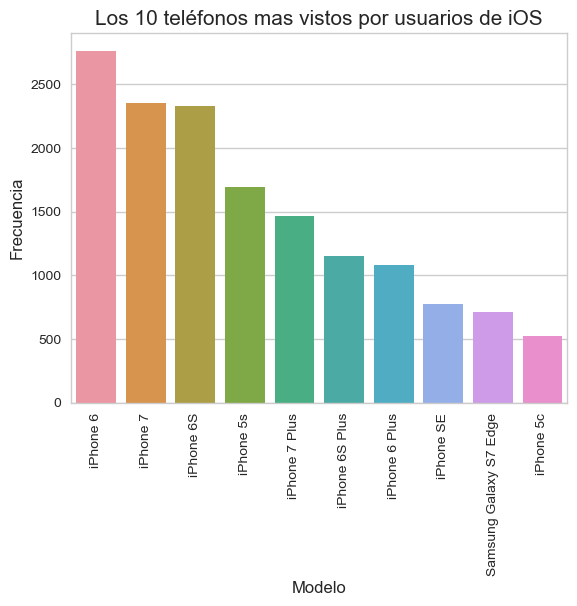

In [122]:
## iOS

df_iOS_full= df[df['person'].isin(df_ios['person'])]
df_iOS_viewed = df_iOS_full[df_iOS_full['event'] == 'viewed product']
top_10_models_viewed_iOS = df_iOS_viewed['model'].value_counts().head(10)

g = sns.barplot(x=top_10_models_viewed_iOS.index, y=top_10_models_viewed_iOS.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas vistos por usuarios de iOS", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)


Text(0,0.5,'Frecuencia')

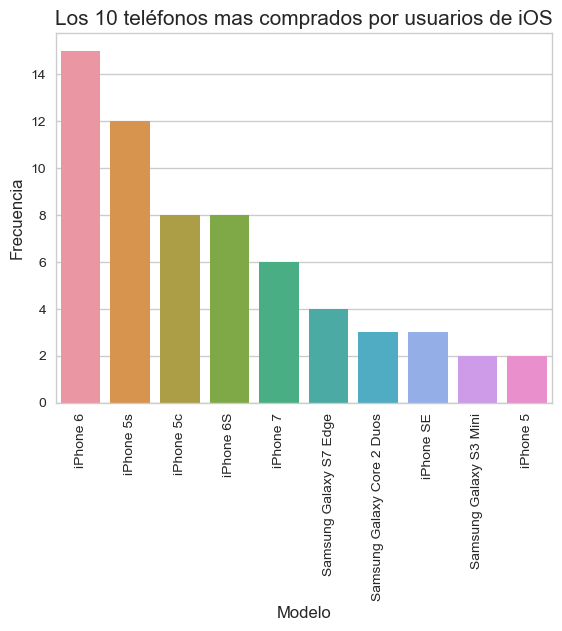

In [123]:
df_iOS_conversion = df_iOS_full[df_iOS_full['event'] == 'conversion']
top_10_models_bought_iOS = df_iOS_conversion['model'].value_counts().head(10)
top_10_models_bought_iOS


g = sns.barplot(x=top_10_models_bought_iOS.index, y=top_10_models_bought_iOS.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas comprados por usuarios de iOS", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)





# Condicion de los equipos

In [124]:
df_model = df.loc[df['model'].notnull()]
df_model['event'].value_counts()
df['event'].shape

(1011288,)

In [125]:
df_model_checkout = df_model.loc[df_model['event'] == 'checkout']
top_checkout_models = (df_model_checkout['model'].value_counts()).nlargest(15)

In [126]:
df_model_checkout = df_model_checkout.loc[df_model_checkout['model'].isin(top_checkout_models.index)]

Text(0,0.5,'Cantidad de Modelos')

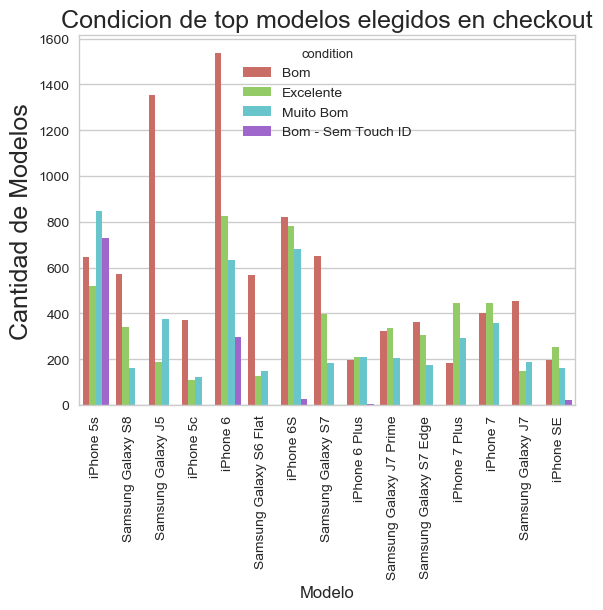

In [127]:
g = sns.countplot(x="model", hue="condition", data=df_model_checkout, palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Condicion de top modelos elegidos en checkout", fontsize=18)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad de Modelos", fontsize=18)

In [128]:
df_model_conversion = df_model.loc[df_model['event'] == 'conversion']
top_conversion_models = (df_model_conversion['model'].value_counts()).nlargest(15)

In [129]:
df_model_conversion = df_model_conversion.loc[df_model_conversion['model'].isin(top_checkout_models.index)]

Text(0,0.5,'Cantidad de Modelos')

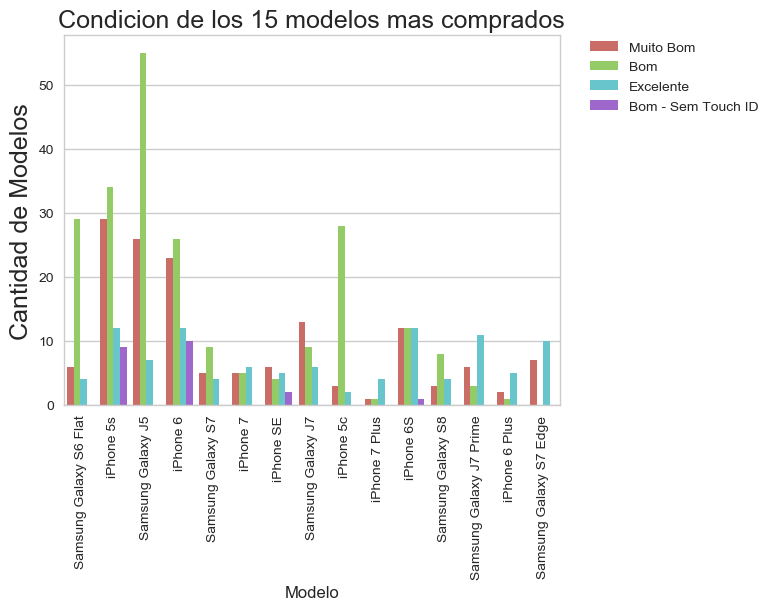

In [130]:
g = sns.countplot(x="model", hue="condition", data=df_model_conversion, palette="hls")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Condicion de los 15 modelos mas comprados", fontsize=18)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad de Modelos", fontsize=18)

In [131]:
df_model_viewed = df_model.loc[df_model['event'] == 'viewed product']
top_viewed_models = (df_model_viewed['model'].value_counts()).nlargest(15)

In [132]:
df_model_viewed = df_model_viewed.loc[df_model_viewed['model'].isin(top_checkout_models.index)]

Text(0,0.5,'Cantidad de Modelos')

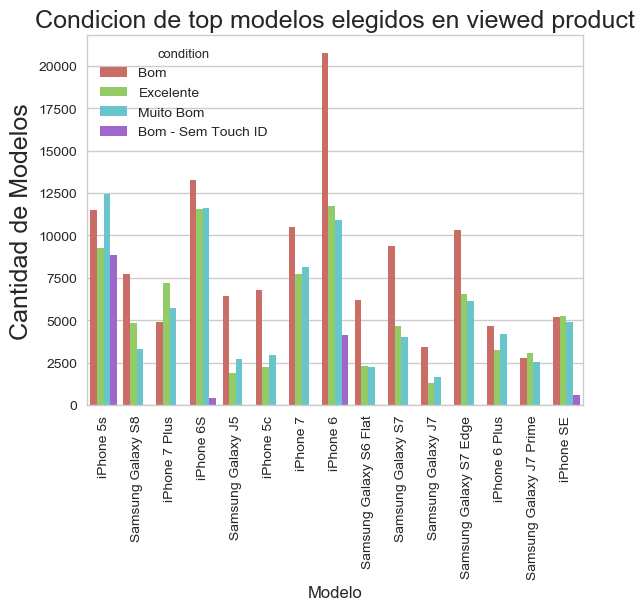

In [133]:
g = sns.countplot(x="model", hue="condition", data=df_model_viewed, palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Condicion de top modelos elegidos en viewed product", fontsize=18)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad de Modelos", fontsize=18)

## Teléfonos vendidos por mes.

In [134]:
df_conversions = df.loc[df['event'] == 'conversion', : ]
df_conversions = df_conversions[['timestamp', 'event', 'condition', 'model']]
df_conversions.head()

,timestamp,event,condition,model
220,2018-03-20 17:46:12,conversion,Muito Bom,Motorola Moto X2
2282,2018-04-26 22:28:53,conversion,Muito Bom,Samsung Galaxy Core Plus Duos TV
2547,2018-06-10 14:37:50,conversion,Muito Bom,Samsung Galaxy S6 Flat
4245,2018-03-16 13:50:25,conversion,Bom,iPhone 5s
6985,2018-02-09 22:07:07,conversion,Bom,Samsung Galaxy J5


In [135]:
df_conversions['date'] = pd.to_datetime(df_conversions['timestamp'])
df_conversions['counter'] = 1
df_conversions['month'] = df_conversions['date'].dt.month
df_conversions['day'] = df_conversions['date'].dt.weekday_name
ct = pd.crosstab(df_conversions.month, df_conversions.day)
ct.head(10)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,7,9,4,6,6,13,18
2,11,11,12,3,20,11,6
3,38,41,34,26,36,57,33
4,51,58,25,39,46,54,43
5,49,54,21,23,70,62,72
6,19,11,10,6,22,18,17


Text(72.7222,0.5,'Month')

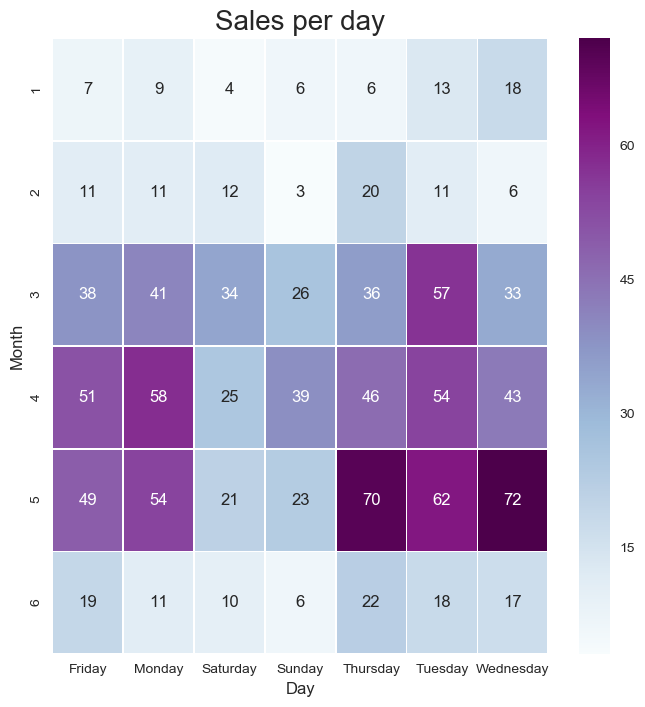

In [136]:
plt.subplots(figsize=(8,8))
grafico_dia_mes=sns.heatmap(ct,linewidths=.5,fmt="d",annot=True,cmap="BuPu")
grafico_dia_mes.set_title("Sales per day",fontsize=20)
grafico_dia_mes.set_xlabel("Day",fontsize=12)
grafico_dia_mes.set_ylabel("Month",fontsize=12)

En el gráfico se puede ver algo que llamaría la atención, y es que los dias Sabados y Domingos no tienen tantas ventas como el resto de los dias de la semana. Por ejemplo, en el mes 5 los dias Sabado se vendieron 21 productos, y los Miercoles, en cambio, se vendieron 72 productos.

Ahora, analizaremos en que condiciones se compran los 10 productos mas vendidos a nivel global.

In [137]:
used_articles = df_conversions.groupby('model')
used_articles = used_articles['counter'].sum()
used_articles = used_articles.sort_values(ascending = False)
used_articles = used_articles.head(10)
articles_conditions = df_conversions.loc[df_conversions['condition'].isin(['Bom', 'Excelente', 'Muito Bom', 'Novo']), : ]
crosstab_aux = articles_conditions.loc[df_conversions['model'].isin(used_articles.index), :]

In [138]:
model_condition = pd.crosstab(crosstab_aux.condition, crosstab_aux.model)
model_condition.head()

model,Motorola Moto G3 4G,Motorola Moto G4 Plus,Samsung Galaxy A5,Samsung Galaxy J5,Samsung Galaxy J7,Samsung Galaxy S6 Flat,iPhone 5c,iPhone 5s,iPhone 6,iPhone 6S
condition,,,,,,,,,,
Bom,24,11,13,55,9,29,28,34,26,12
Excelente,2,7,1,7,6,4,2,12,12,12
Muito Bom,4,12,13,26,13,6,3,29,23,12


Text(72.7222,0.5,'Condition')

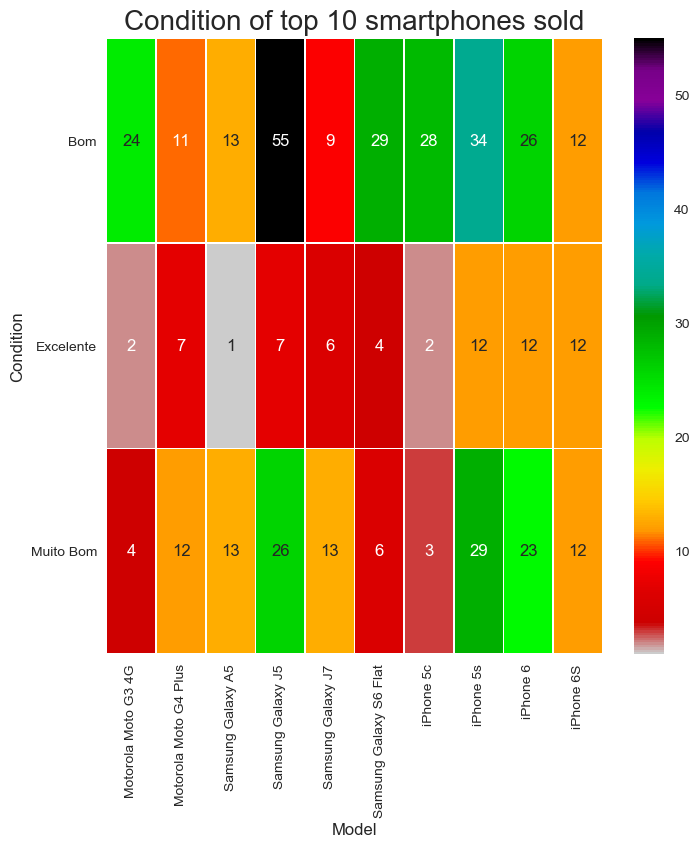

In [139]:
plt.subplots(figsize=(8,8))
grafico_modelo_condicion=sns.heatmap(model_condition,linewidths=.5,fmt="d",annot=True,cmap="nipy_spectral_r")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
grafico_modelo_condicion.set_title("Condition of top 10 smartphones sold",fontsize=20)
grafico_modelo_condicion.set_xlabel("Model",fontsize=12)
grafico_modelo_condicion.set_ylabel("Condition",fontsize=12)

Se puede ver que la gente prefiere comprar teléfonos que estan en buen estado, pero no en su mejor estado.

# Analisis regional utilizando Geoplots

En esta sección se analizarán algunos datos según las regiones que aparecen en el set de datos.

In [140]:
import geopandas
import geoplot

Para poder realizar esto, se hizo uso de la libreria 'Geopandas' y 'Geoplot' la cuál permite realizar gráficos en determinadas regiones, complementando a pandas con GeoSeries y GeoDataFrames. Para comenzar, veremos la cantidad de registros que se generaron en todo el dataframe, a nivel global.

C:\Users\Juan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(161.222,0.5,'Latitud')

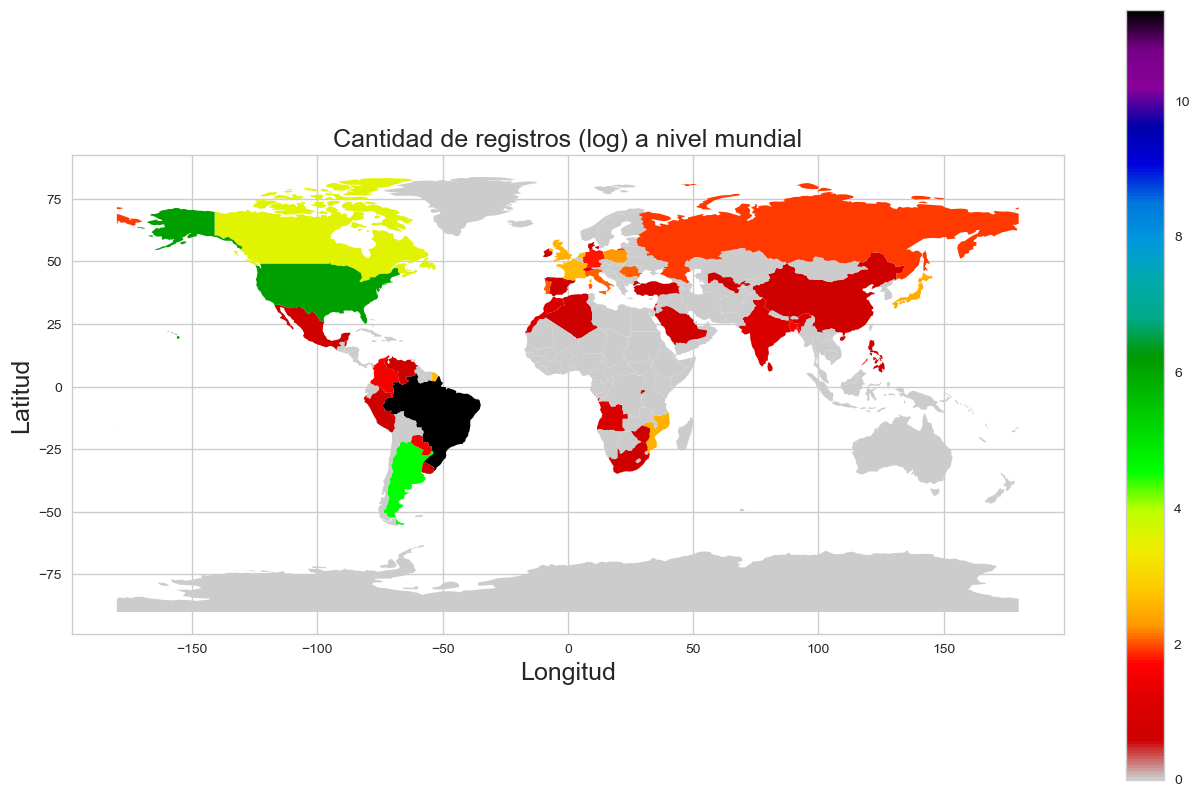

In [141]:
#GeoDataFrame global
path = geopandas.datasets.get_path('naturalearth_lowres')
df_geo = geopandas.read_file(path)

df = pd.read_csv('events.csv')

df_countries = df[['country']].dropna()
df_countries['counter'] = 1

aux = df_countries.groupby('country')
aux = aux.agg('sum')

df_geo = df_geo.rename(columns = {'name' : 'country'})

df_geo = df_geo.merge(aux, on='country', how='left')
df_geo = df_geo.fillna(0)

#Ploteamos el logaritmo de la cantidad de registros por la amplia diferencia
#entre Brasil y el resto del mundo
df_geo['counter_log'] = np.log(df_geo["counter"]+1)

graph = df_geo.plot(figsize=(16,10), column='counter_log', \
                   cmap='nipy_spectral_r', legend=True, k=100)
graph.set_title('Cantidad de registros (log) a nivel mundial', fontsize=18)
graph.set_xlabel("Longitud",fontsize=18)
graph.set_ylabel("Latitud", fontsize=18)

A partir de la visualizacion anterior, se pueden rescatar los siguientes datos:
1. Trocafone tiene más popularidad en America que en otras regiones del mundo.
2. Debido a su origen, Brasil es el pais con mayor cantidad de registros, seguido por Estados Unidos y Argentina.
3. No se obtuvieron registros de Oceania ni de la mayor parte de África.

Dado que observamos que la mayor cantidad de registros provienen de Brasil y Estados Unidos, será conveniente entonces realizar un analisis similar pero focalizado en estos dos paises.

## Cantidad de registros por región en Brasil

C:\Users\Juan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(262.09,0.5,'Latitud')

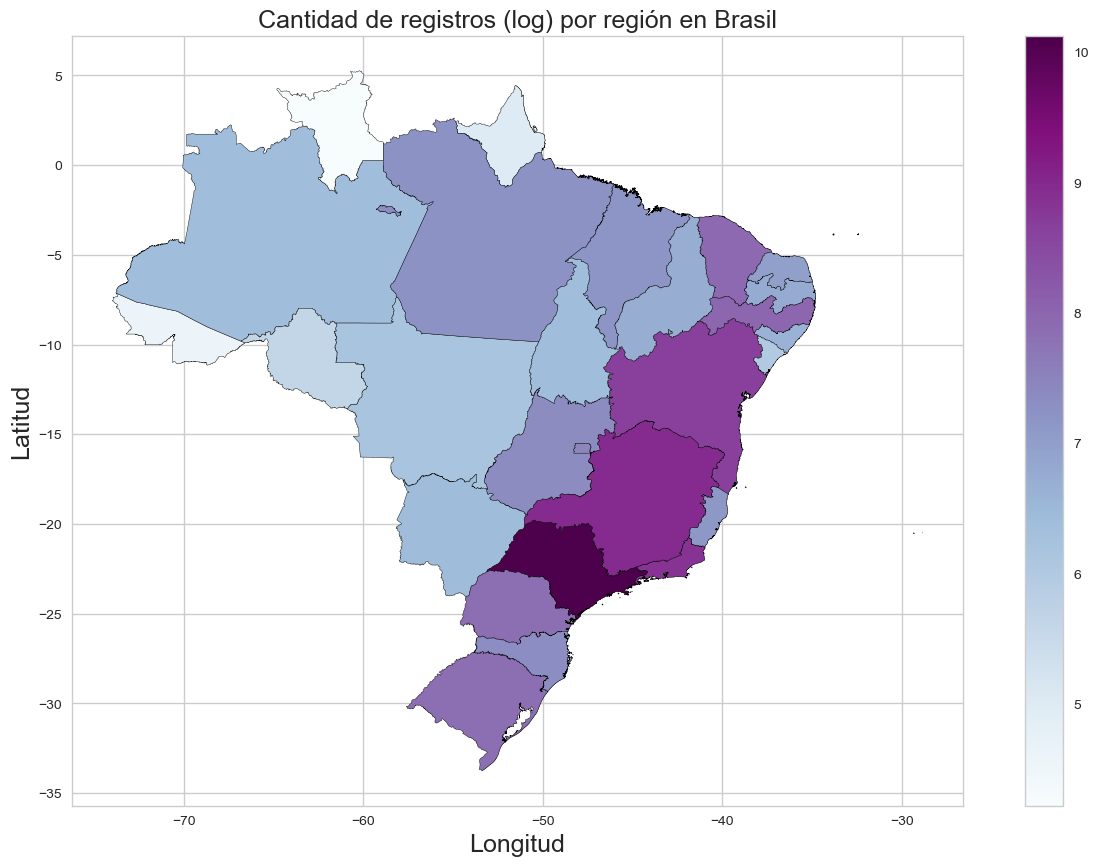

In [142]:
#Cargo el GeoDataFrame de Brasil
brazil_gdf = geopandas.read_file('brasil_shp/gadm36_BRA_1.shp') #gdf = GeoDataFrame

#Normalizo los str de las regiones ya que contienen tildes y otros caracteres
brazil_gdf['NAME_1'] = brazil_gdf['NAME_1'].str.normalize('NFKD')\
            .str.encode('ascii', errors='ignore').str.decode('utf-8')

#Cargo el DataFrame de Trocafone            
df = pd.read_csv('events.csv')

df_brazil = df.loc[df['country'] == 'Brazil', ['region','country']]
df_brazil = df_brazil.loc[df_brazil['region'].notnull(), :]
df_brazil = df_brazil.loc[~df_brazil['region'].isin(['Unknown']), :]
df_brazil['region'] = df_brazil['region'].str.normalize('NFKD')\
                .str.encode('ascii',errors='ignore').str.decode('utf-8')

#Pequeña corrección para luego joinear. Federal District --> Distrito Federal
df_brazil = df_brazil.replace(to_replace='Federal District', \
                              value='Distrito Federal')
df_brazil['counter'] = df_brazil['region'].isin(brazil_gdf.NAME_1)
df_brazil = df_brazil.groupby('region').sum()
df_brazil = df_brazil.reset_index()
df_brazil = df_brazil.rename(columns={'region':'NAME_1'})
brazil_gdf = brazil_gdf.merge(df_brazil, on='NAME_1', how='left')

#Debido a la gran diferencia de registros de Sao Paulo con el resto, ploteamos log
brazil_gdf['counter_log'] = np.log(brazil_gdf["counter"]+1)

graph = brazil_gdf.plot(column='counter_log',edgecolor='black', legend=True, \
                 cmap='BuPu', figsize=(16,10))

graph.set_title('Cantidad de registros (log) por región en Brasil', fontsize=18)
graph.set_xlabel("Longitud",fontsize=18)
graph.set_ylabel("Latitud", fontsize=18)

A partir del gráfico, se puede extraer que las regiones donde Trocafone es mas popular son Sao Paulo, Minas Gerais, Bahia, Pernambuco, Ceará y Rio Grande do Sul. Es también entendible por ser las zonas mas habitadas del pais (el estado de Sao Paulo es el que mayor habitantes tiene en toda la región, con un total de, aproximadamente, 45 millones de habitantes). A partir de esta información es que se podria recomendar hacer incapié en el desarrollo de la empresa en dichas regiones.

## Cantidad de registros por región en Estados Unidos

C:\Users\Juan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(169.222,0.5,'Latitud')

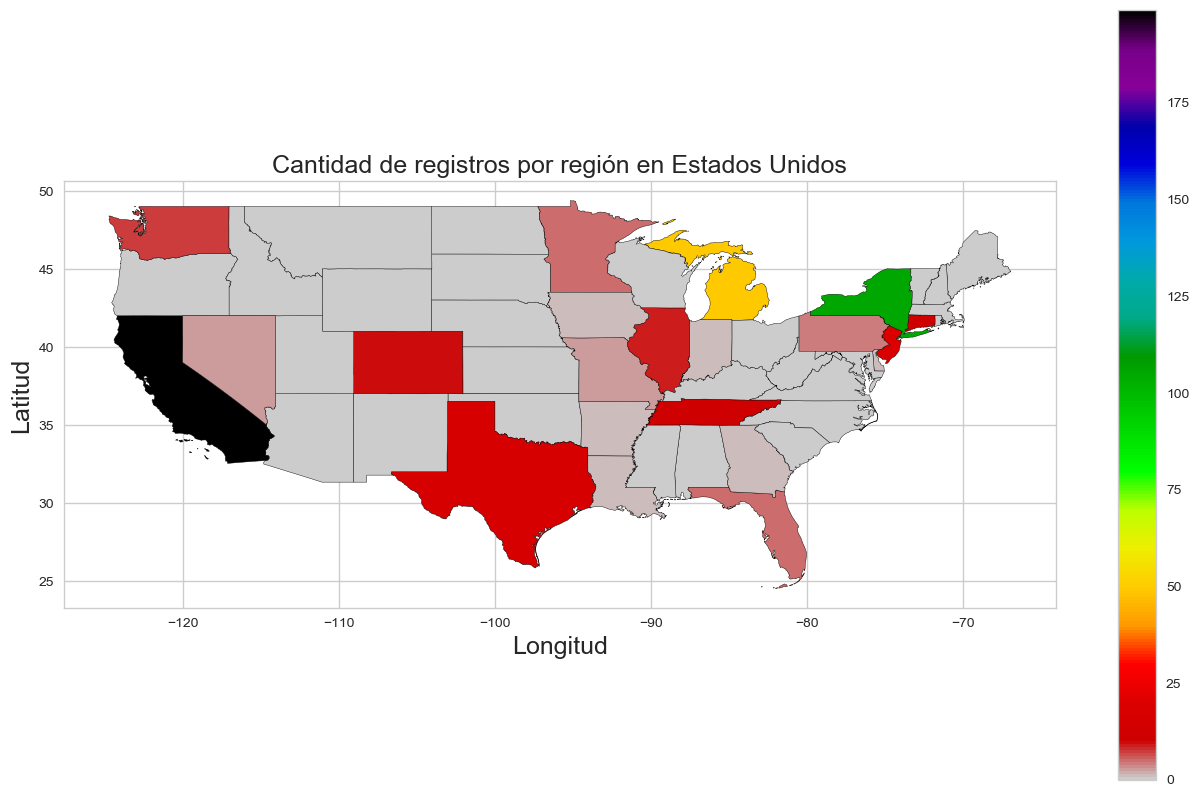

In [143]:
usa_gdf = geopandas.read_file('usa_shp/cb_2017_us_state_5m.shp')
df = pd.read_csv('events.csv')
df_just_usa = df.loc[df['country'] == 'United States', ['region', 'country']]
df_just_usa['counter'] = 1
df_just_usa = df_just_usa.groupby('region').agg('sum')
df_just_usa = df_just_usa.reset_index()
df_just_usa = df_just_usa.rename(columns = {'region' : 'NAME'})
usa_gdf = usa_gdf.merge(df_just_usa,on='NAME', how='left')
usa_gdf = usa_gdf.fillna(0)

#Quitamos algunos sectores del mapa, como Hawaii o Alaska, para que el plot
#sea mas prolijo. Ninguno de estos sectores aparece en el dataset
usa_gdf = usa_gdf[usa_gdf.STATEFP.astype(int) < 60]
usa_gdf = usa_gdf[~usa_gdf.NAME.isin(['Hawaii','Alaska'])]


graph = usa_gdf.plot(column='counter',edgecolor='black', legend=True,\
                 cmap='nipy_spectral_r', figsize=(16,10))
graph.set_title('Cantidad de registros por región en Estados Unidos',\
                fontsize=18)
graph.set_xlabel("Longitud",fontsize=18)
graph.set_ylabel("Latitud", fontsize=18)

Haciendo un analisis similar al anterior, se puede decir que los estados americanos que mas registros generaron en el último tiempo fueron California, Nueva York y Michigan. A diferencia con el anterior, solo se pueden ver algunos de los estados, y la mayor parte del pais tiene pocas o no tiene interacciones, como el caso de Texas, Colorado o Florida. Aún asi, es tambien recomendable hacer incapié en el desarrollo en las zonas remarcadas, especialmente en California.

# Tipos de dispositivos usados por los clientes

In [144]:
user_info = df.loc[df['event'] == 'visited site', ['event','person','city',\
                   'region', 'country', 'device_type', 'operating_system_version',\
                   'browser_version']]

df_mobile = user_info.loc[~user_info['device_type'].str.contains('Computer'), :]
df_not_mobile = user_info.loc[user_info['device_type'].str.contains('Computer'), :]


df_mobile['device'] = 'Mobile'
df_mobile = df_mobile[['person','device']]
df_not_mobile['device'] = 'Not Mobile'
df_not_mobile = df_not_mobile[['person','device']]

df_user_device = df_mobile.merge(df_not_mobile, how='outer')
df_user_device = df_user_device.drop_duplicates()

user_info = user_info.merge(df_user_device, how='outer')
user_info = user_info.drop_duplicates()

device_percentage = (user_info.groupby(['country'])['device']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('country'))
device_percentage = device_percentage.loc[device_percentage['percentage'] != 100.0, :]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

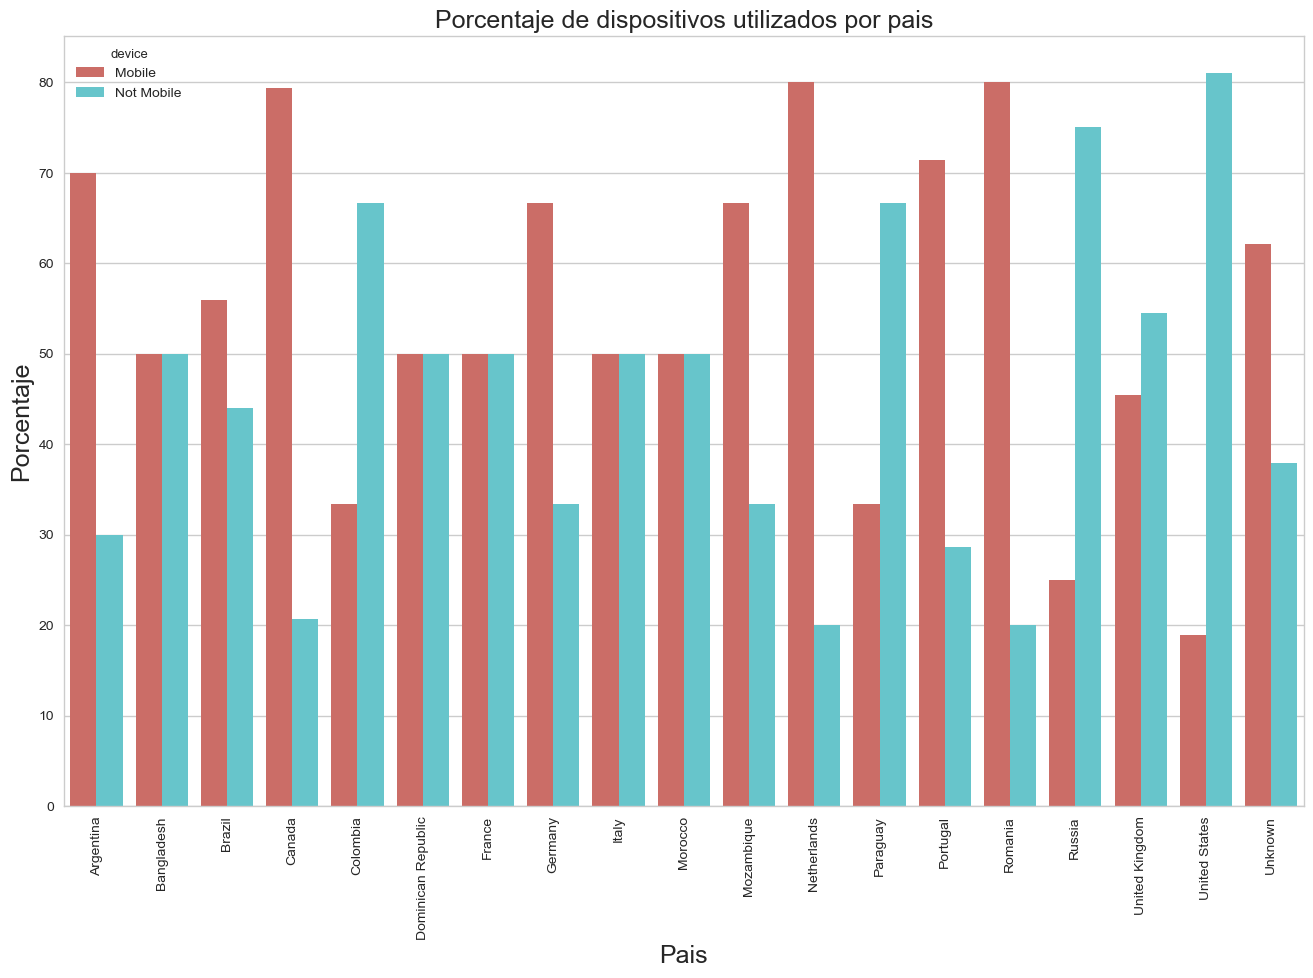

In [145]:
plt.figure(figsize=(16,10))
g = sns.barplot(x="country", y='percentage', hue="device", data=device_percentage,\
                palette="hls")
g.set_title("Porcentaje de dispositivos utilizados por pais", fontsize=18)
g.set_xlabel("Pais", fontsize=18)
g.set_ylabel("Porcentaje", fontsize=18)
plt.xticks(rotation=90)

# Viewed product. Análisis por país

In [146]:
#Informacion de Pais y región de cada usuario
users_locale = df[['person','country','region']]
users_locale = users_locale.dropna().drop_duplicates('person')

users_models = df.loc[df['person'].isin(users_locale['person']), ['person','model','event']]
users_models = users_models.dropna()
users_models = users_models.loc[users_models['event'] == 'viewed product',:]
users_models = users_models.merge(users_locale, on='person', how='left')

## Brasil

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

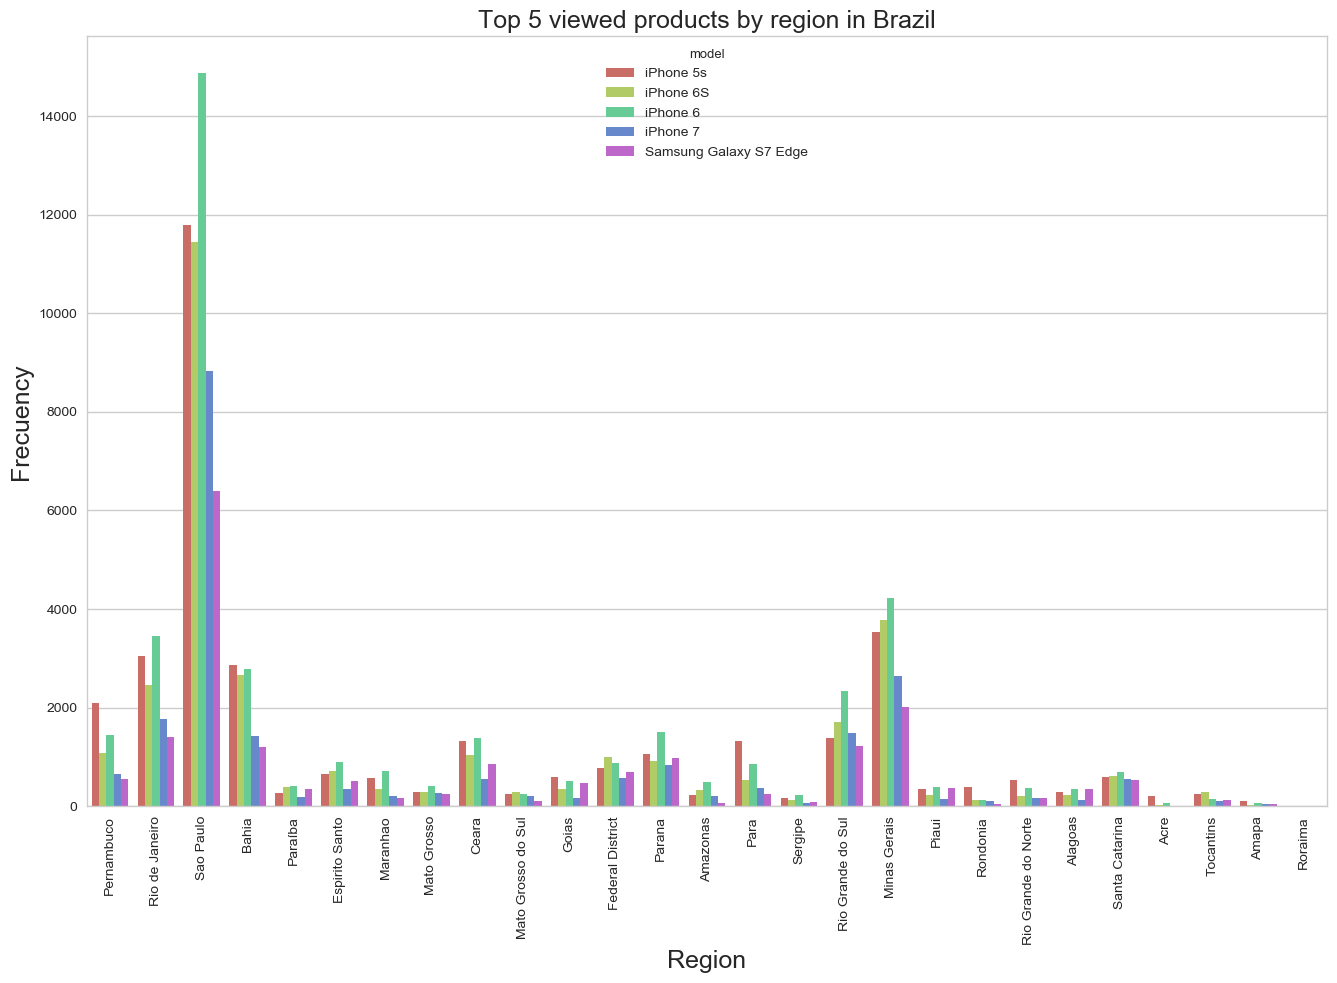

In [147]:
brazil = users_models.loc[users_models['country'] == 'Brazil', :]
top_models = brazil['model'].value_counts().head(5).index
brazil = brazil.loc[brazil['model'].isin(top_models), :]
brazil = brazil.loc[brazil['region'] != 'Unknown', :]

plt.figure(figsize=(16,10))
g = sns.countplot(x="region", hue="model", data=brazil, palette="hls")
g.set_title("Top 5 viewed products by region in Brazil", fontsize=18)
g.set_xlabel("Region", fontsize=18)
g.set_ylabel("Frecuency", fontsize=18)
plt.xticks(rotation=90)

## Estados Unidos

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

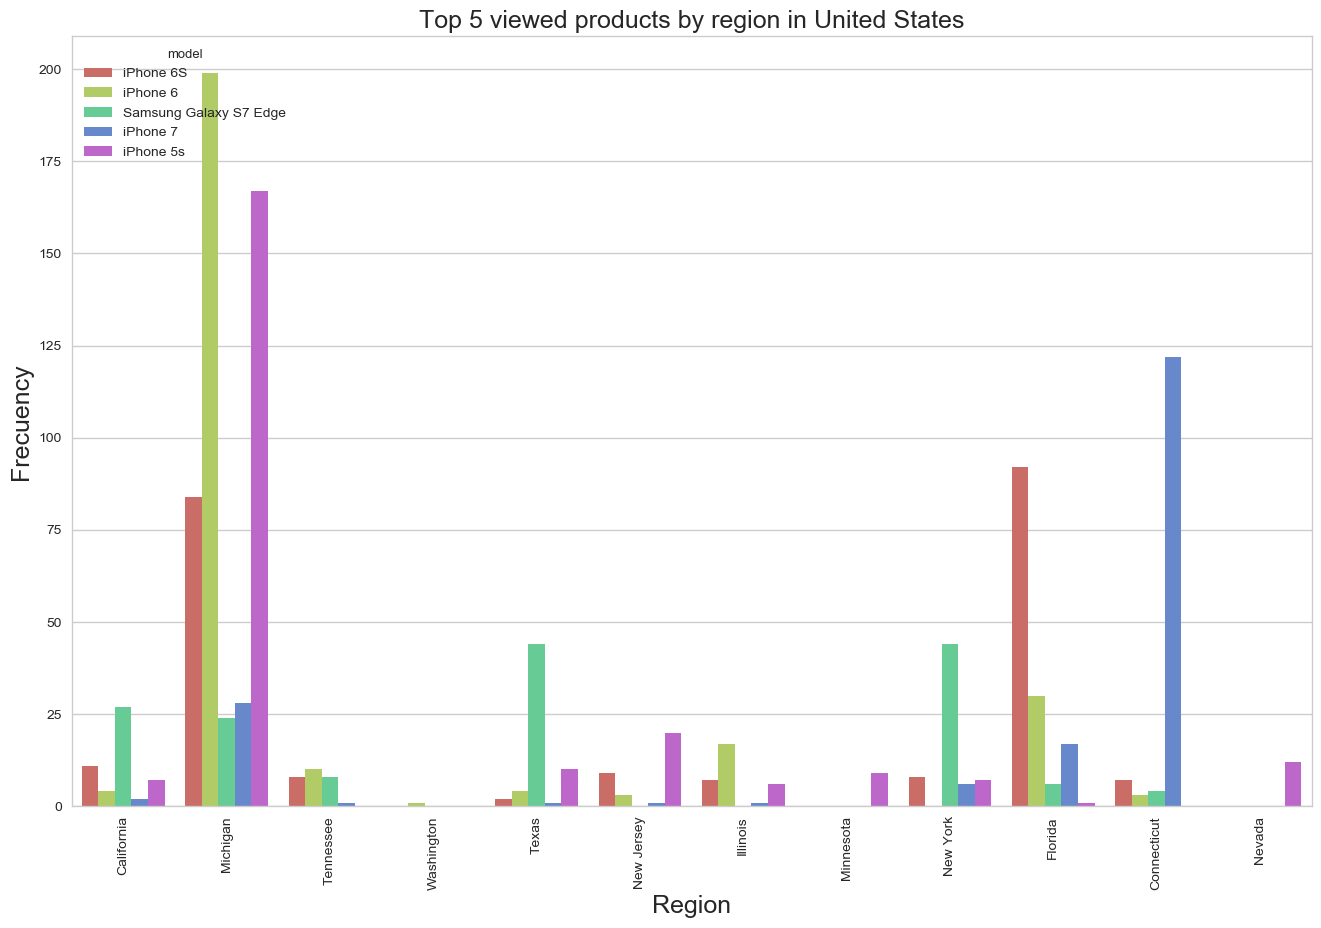

In [148]:
usa = users_models.loc[users_models['country'] == 'United States', :]
top_models = usa['model'].value_counts().head(5).index
usa = usa.loc[usa['model'].isin(top_models), :]
usa = usa.loc[usa['region'] != 'Unknown', :]

plt.figure(figsize=(16,10))
g = sns.countplot(x="region", hue="model", data=usa, palette="hls")
g.set_title("Top 5 viewed products by region in United States", fontsize=18)
g.set_xlabel("Region", fontsize=18)
g.set_ylabel("Frecuency", fontsize=18)
plt.xticks(rotation=90)

## Argentina

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

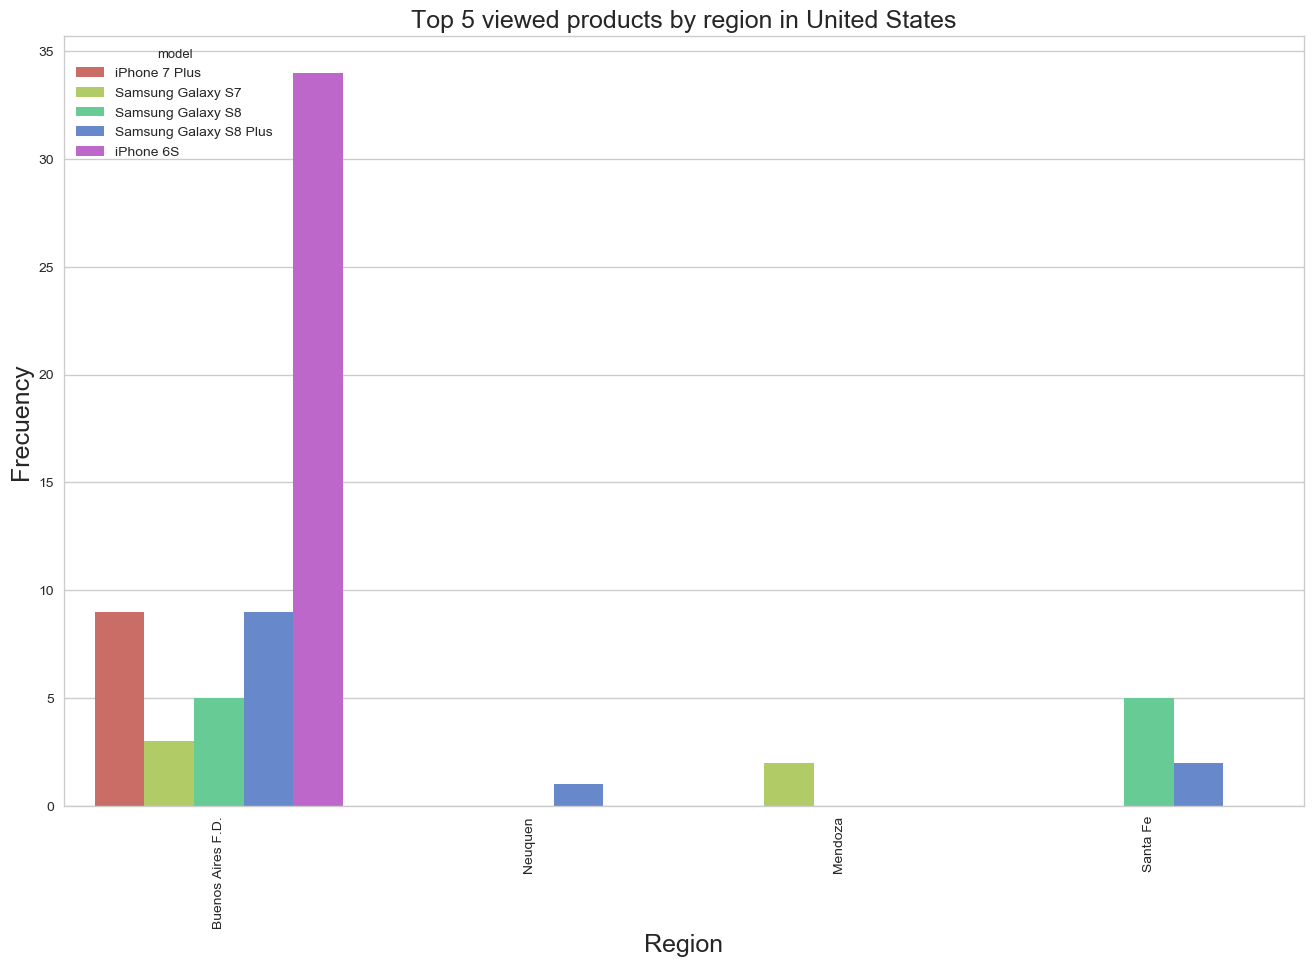

In [149]:
arg = users_models.loc[users_models['country'] == 'Argentina', :]
top_models = arg['model'].value_counts().head(5).index
arg = arg.loc[arg['model'].isin(top_models), :]
arg = arg.loc[arg['region'] != 'Unknown', :]

plt.figure(figsize=(16,10))
g = sns.countplot(x="region", hue="model", data=arg, palette="hls")
g.set_title("Top 5 viewed products by region in United States", fontsize=18)
g.set_xlabel("Region", fontsize=18)
g.set_ylabel("Frecuency", fontsize=18)
plt.xticks(rotation=90)

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 100)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv')

C:\Users\Juan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [158]:
df_model = df[df.model.notnull()][['person', 'model']]
model_persons = df_model['person']                #  SERIE CON PERSONAS QEUE ESTA
df_model_users = df.loc[df['person'].isin(model_persons), :]
df_model_users_buys = df_model_users.loc[df['event'] == 'conversion']
models_counts = df_model_users_buys['model'].value_counts().head(8)
models_counts

Samsung Galaxy J5         88
iPhone 5s                 84
iPhone 6                  71
Samsung Galaxy S6 Flat    39
iPhone 6S                 37
iPhone 5c                 33
Motorola Moto G3 4G       30
Motorola Moto G4 Plus     30
Name: model, dtype: int64

In [159]:
sales_Samsung = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Samsung')].value_counts())
sales_iPhone = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('iPhone')].value_counts())
sales_Motorola = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Motorola')].value_counts())
sales_LG = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('LG')].value_counts())
sales_Sony = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Sony')].value_counts())
sales_Asus = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Asus')].value_counts())
sales_Lenovo = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Lenovo')].value_counts())

df_brand_sales = pd.DataFrame({'brand': ['Samsung', 'iPhone', 'Motorola', 'LG', 'Sony', 'Asus', 'Lenovo'],
                   'sales': [sales_Samsung, sales_iPhone, sales_Motorola, sales_LG, sales_Sony, sales_Asus, sales_Lenovo]})
df_brand_sales.sort_values('sales', ascending=False)


,brand,sales
0,Samsung,641
1,iPhone,323
2,Motorola,149
4,Sony,23
3,LG,20
6,Lenovo,14
5,Asus,2


Text(0,0.5,'Frequency')

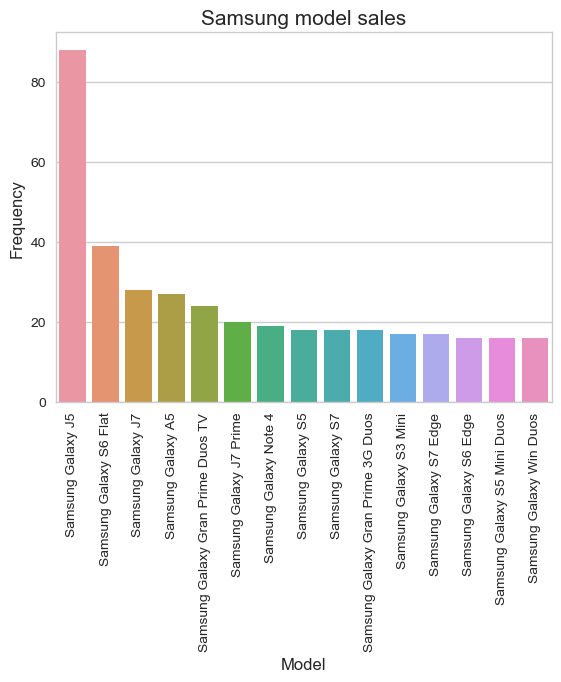

In [160]:
sales_Samsung = df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Samsung')].value_counts().head(15)

g2 = sns.barplot(x=sales_Samsung.index, y=sales_Samsung.values, orient = 'v')
plt.xticks(rotation=90)
g2.set_title("Samsung model sales", fontsize = 15)
g2.set_xlabel("Model", fontsize = 12)
g2.set_ylabel("Frequency", fontsize = 12)

Text(0,0.5,'Frequency')

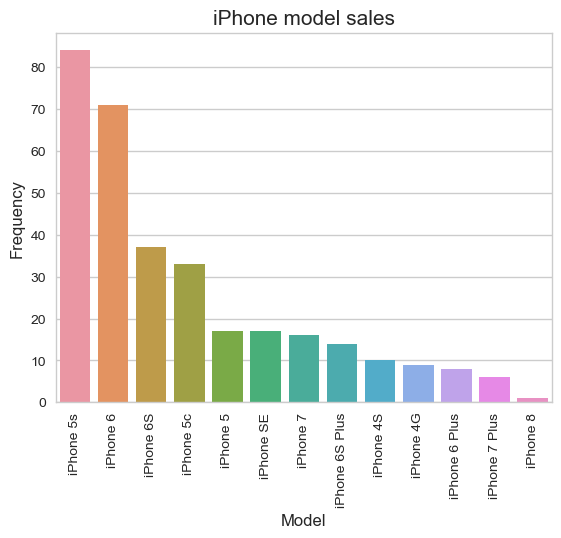

In [161]:
sales_iPhone = df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('iPhone')].value_counts().head(15)

g2 = sns.barplot(x=sales_iPhone.index, y=sales_iPhone.values, orient = 'v')
plt.xticks(rotation=90)
g2.set_title("iPhone model sales", fontsize = 15)
g2.set_xlabel("Model", fontsize = 12)
g2.set_ylabel("Frequency", fontsize = 12)

Text(0,0.5,'Frequency')

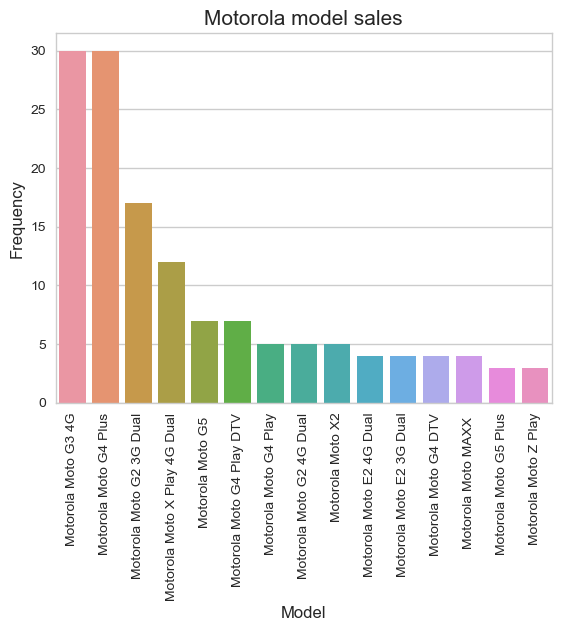

In [162]:
sales_Motorola = df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Motorola')].value_counts().head(15)

g2 = sns.barplot(x=sales_Motorola.index, y=sales_Motorola.values, orient = 'v')
plt.xticks(rotation=90)
g2.set_title("Motorola model sales", fontsize = 15)
g2.set_xlabel("Model", fontsize = 12)
g2.set_ylabel("Frequency", fontsize = 12)

C:\Users\Juan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

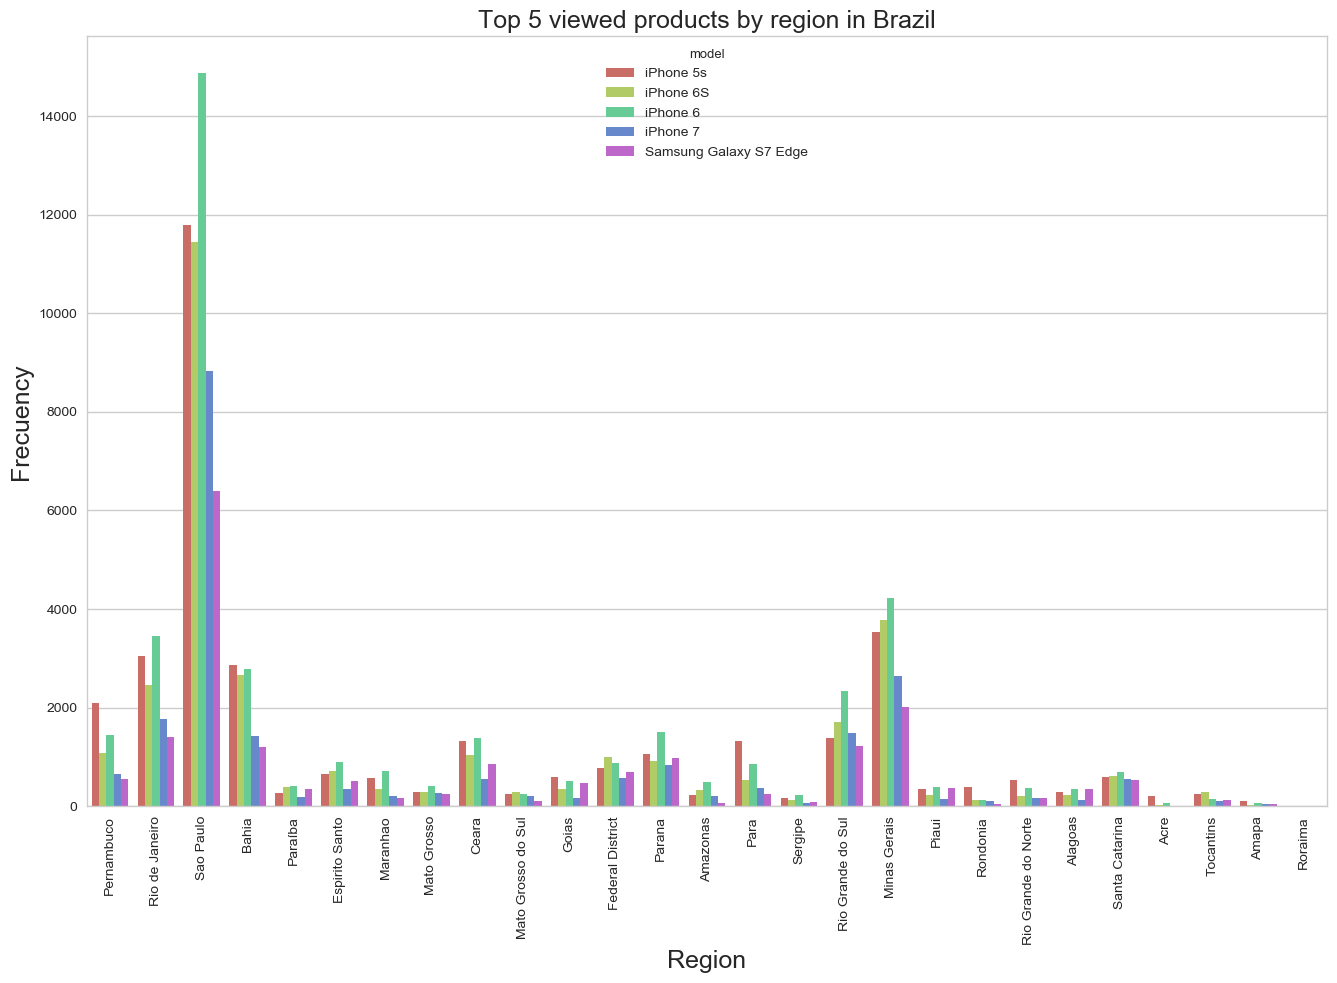

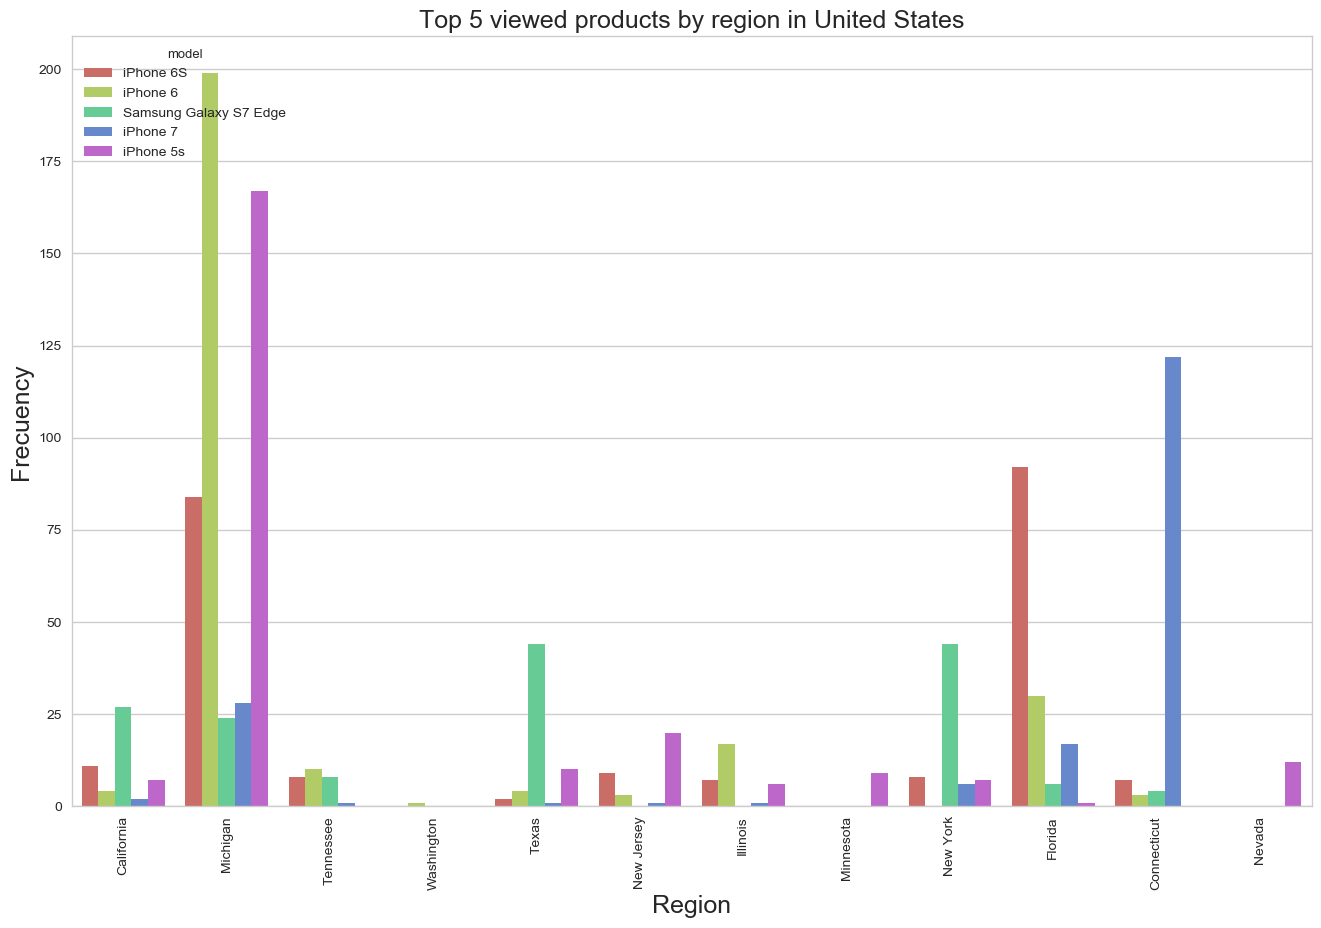

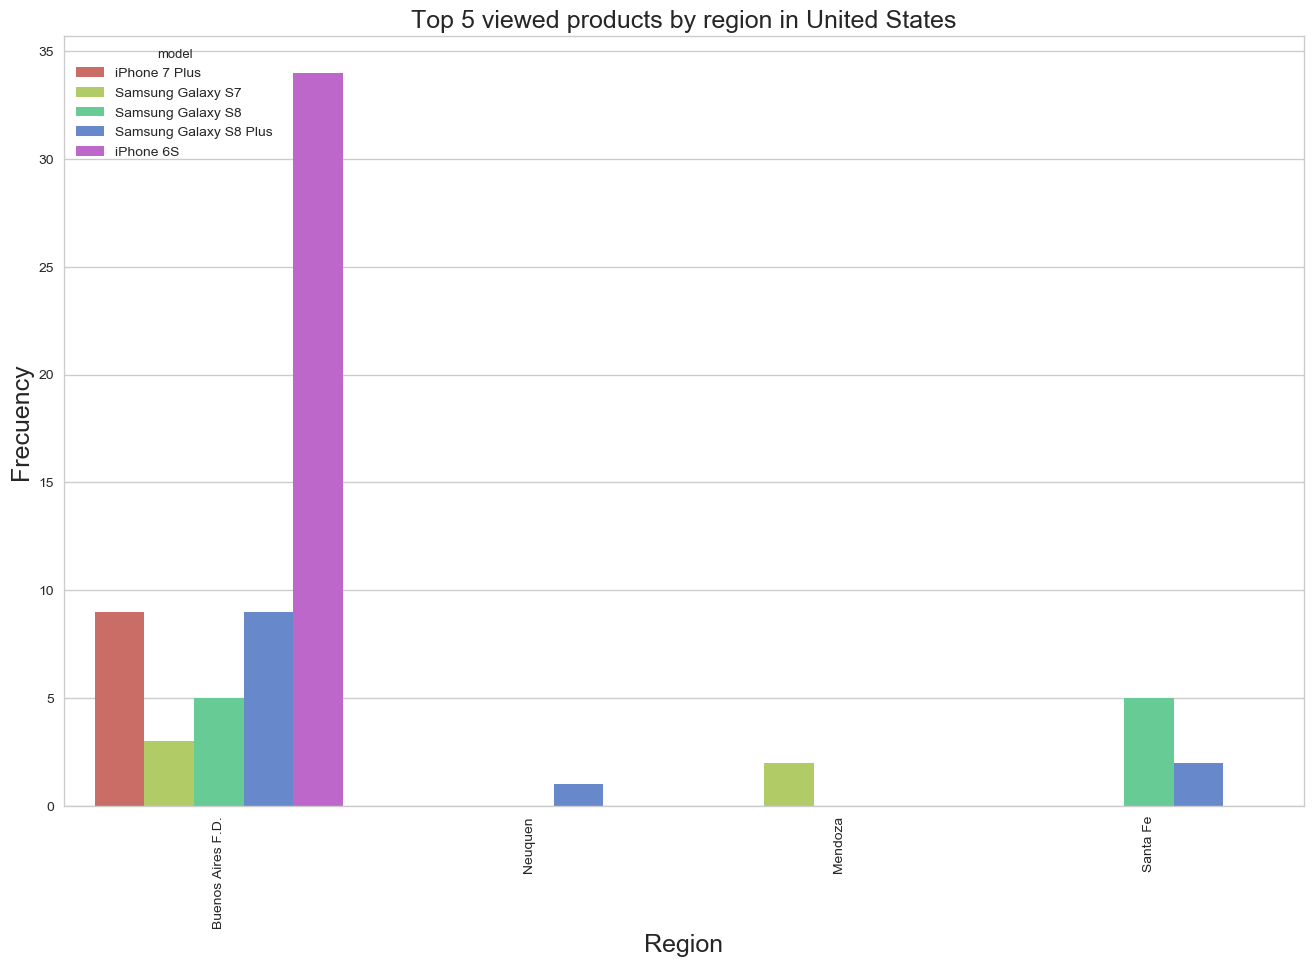

In [164]:
# Viewed product. Análisis por país

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('events.csv')

#Informacion de Pais y región de cada usuario
users_locale = df[['person','country','region']]
users_locale = users_locale.dropna().drop_duplicates('person')

users_models = df.loc[df['person'].isin(users_locale['person']), ['person','model','event']]
users_models = users_models.dropna()
users_models = users_models.loc[users_models['event'] == 'viewed product',:]
users_models = users_models.merge(users_locale, on='person', how='left')

## Brasil

brazil = users_models.loc[users_models['country'] == 'Brazil', :]
top_models = brazil['model'].value_counts().head(5).index
brazil = brazil.loc[brazil['model'].isin(top_models), :]
brazil = brazil.loc[brazil['region'] != 'Unknown', :]

plt.figure(figsize=(16,10))
g = sns.countplot(x="region", hue="model", data=brazil, palette="hls")
g.set_title("Top 5 viewed products by region in Brazil", fontsize=18)
g.set_xlabel("Region", fontsize=18)
g.set_ylabel("Frecuency", fontsize=18)
plt.xticks(rotation=90)

## Estados Unidos

usa = users_models.loc[users_models['country'] == 'United States', :]
top_models = usa['model'].value_counts().head(5).index
usa = usa.loc[usa['model'].isin(top_models), :]
usa = usa.loc[usa['region'] != 'Unknown', :]

plt.figure(figsize=(16,10))
g = sns.countplot(x="region", hue="model", data=usa, palette="hls")
g.set_title("Top 5 viewed products by region in United States", fontsize=18)
g.set_xlabel("Region", fontsize=18)
g.set_ylabel("Frecuency", fontsize=18)
plt.xticks(rotation=90)

## Argentina

arg = users_models.loc[users_models['country'] == 'Argentina', :]
top_models = arg['model'].value_counts().head(5).index
arg = arg.loc[arg['model'].isin(top_models), :]
arg = arg.loc[arg['region'] != 'Unknown', :]

plt.figure(figsize=(16,10))
g = sns.countplot(x="region", hue="model", data=arg, palette="hls")
g.set_title("Top 5 viewed products by region in United States", fontsize=18)
g.set_xlabel("Region", fontsize=18)
g.set_ylabel("Frecuency", fontsize=18)
plt.xticks(rotation=90)

## Analisis del evento "lead"

Veremos como se comporta los usuarios que accedieron a este evento de la pagina.

In [165]:
lead = (df.loc[df['event'] == 'lead'])['person']
df_lead_users = df.loc[df.person.isin(lead)]
df_lead_users.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,63887,63887,63887,3881,34000.0,34448,34000,34000,34000,17265,3060,410,3882,2283,5529,5529,5529,5529,5529,5529,5529,5529,5529
unique,56926,11,291,148,2117.0,181,5,8,61,6736,733,12,19,3,6,2,278,27,5,3,47,35,81
top,2018-03-21 01:11:52,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"3371,6357,6371,2777,3191,6791,2718,2725,6399,3...",J7,CustomerService,google,Google,Direct,Returning,Unknown,Sao Paulo,Brazil,Computer,360x640,Windows 7,Chrome 66.0
freq,6,32907,2771,1362,255.0,2558,14599,12286,8984,62,109,226,2258,2221,1830,5243,1006,1152,5376,2813,1949,1329,1032


Vemos que solo 291 personas lo utilizaron

In [166]:
event_counts_lead = df_lead_users.event.value_counts()
checkout_vs_conversion = event_counts_lead.drop(labels=['ad campaign hit', 'viewed product','staticpage','lead', 'brand listing'])
event_counts_lead

viewed product       32907
brand listing         9439
visited site          5529
generic listing       4381
ad campaign hit       3887
searched products     3510
search engine hit     2283
checkout               969
lead                   448
staticpage             410
conversion             124
Name: event, dtype: int64

Tambien vemos que de esas 291 personas se realizaron 124 conversion lo que es un muy buen valor dada la proporcion

In [167]:
conversion_person_lead =(df_lead_users.loc[df_lead_users['event'] == 'conversion'])['person'].drop_duplicates()
df_lead_users_conversion = df_lead_users.loc[df_lead_users['person'].isin(conversion_person_lead)]
event_counts_lead_conversion= df_lead_users_conversion.event.value_counts()
event_counts_lead= df_lead_users.event.value_counts()
checkout_vs_conversion_lead = event_counts_lead_conversion.drop(labels=['ad campaign hit', 'viewed product','staticpage','lead', 'brand listing'])
event_counts_lead


viewed product       32907
brand listing         9439
visited site          5529
generic listing       4381
ad campaign hit       3887
searched products     3510
search engine hit     2283
checkout               969
lead                   448
staticpage             410
conversion             124
Name: event, dtype: int64

In [168]:
conversion_person_lead.describe()

count           58
unique          58
top       1de395ee
freq             1
Name: person, dtype: object

De las 291 personas 58 decidieron comprar, y al tener 124 compras vemos que muchos compraron mas de una vez!


In [169]:
data_from_lead = pd.DataFrame({"Personas que usaron el evento lead":[291], "Personas que pidieron stock y compraron":[58], "Compras realizadas totales":[124]})
data_from_lead

,Personas que usaron el evento lead,Personas que pidieron stock y compraron,Compras realizadas totales
0,291,58,124


Text(0.5,0,'Cantidad')

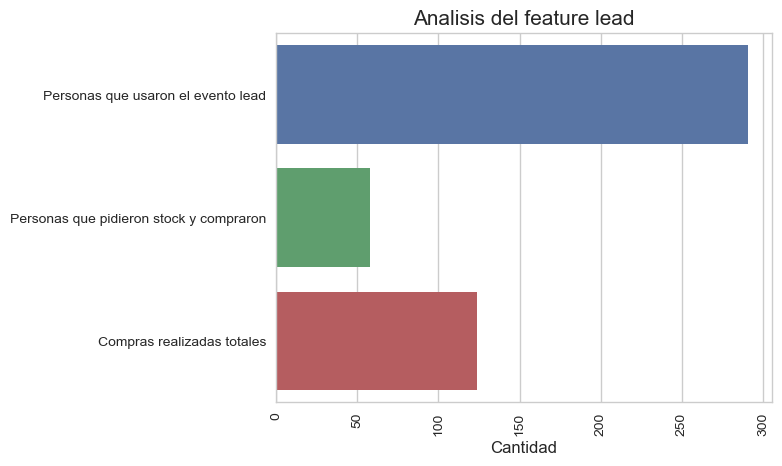

In [170]:
g = sns.barplot(x=data_from_lead.iloc[0], y=data_from_lead.columns, orient='h')
plt.xticks(rotation=90)
g.set_title("Analisis del feature lead", fontsize=15)
g.set_xlabel("Cantidad", fontsize=12)


Con los datos que fuimos juntando armamos este grafico que compara las cantidades entre los evento lead,los usuarios, y las compras realizadas por estos usuarios

In [171]:
df_lead_users_conversions = df_lead_users.loc[df_lead_users['event']== 'conversion']


df_lead_models = df_lead_users.loc[df_lead_users['person'].isin(df_lead_users_conversions['person'])]
df_lead_models = df_lead_models.loc[df_lead_models['event'] == 'lead']


values1 = df_lead_models['model'].value_counts().head(15)
values2 =df_lead_users_conversions['model'].value_counts().head(15)
ind = values1.index
ind2 = values2.index

Text(0,0.5,'Cantidad')

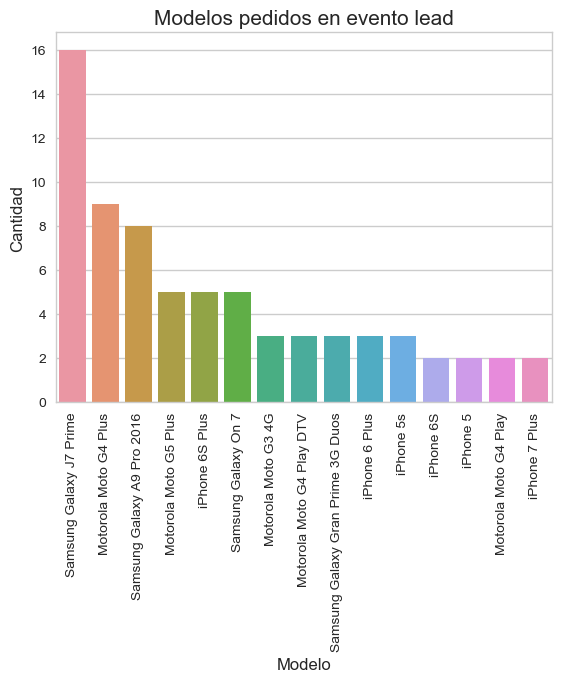

In [172]:
g = sns.barplot(x=ind, y=values1, orient='v')
plt.xticks(rotation=90)
g.set_title("Modelos pedidos en evento lead", fontsize=15)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad", fontsize=12)


Modelos en los que fue mas comun un evento de lead

Text(0,0.5,'Cantidad')

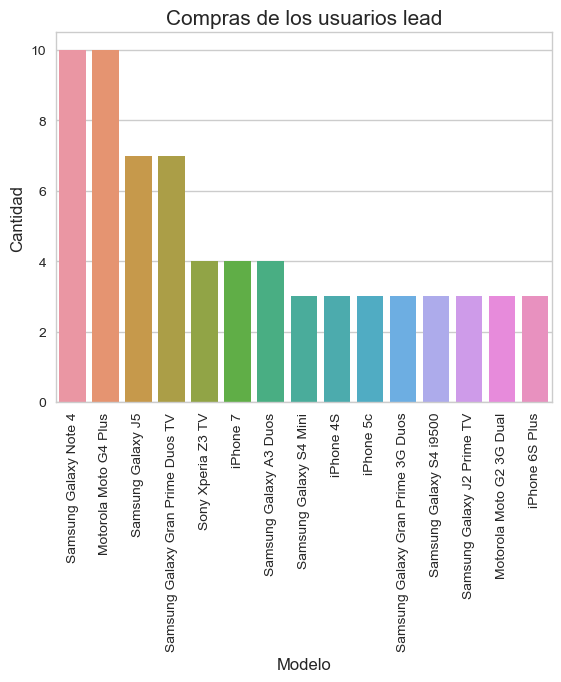

In [173]:
g = sns.barplot(x=ind2, y=values2, orient='v')
plt.xticks(rotation=90)
g.set_title("Compras de los usuarios lead", fontsize=15)
g.set_xlabel("Modelo", fontsize=12)
g.set_ylabel("Cantidad", fontsize=12)

Los modelos que fueron mas comprados por los usuarios que hicieron lead

# Productos mas vendidos a nivel global

In [174]:
df_conversions = df.loc[df['event'] == 'conversion', : ]
df_conversions = df_conversions[['timestamp', 'event', 'condition', 'model']]
df_conversions.head()

,timestamp,event,condition,model
220,2018-03-20 17:46:12,conversion,Muito Bom,Motorola Moto X2
2282,2018-04-26 22:28:53,conversion,Muito Bom,Samsung Galaxy Core Plus Duos TV
2547,2018-06-10 14:37:50,conversion,Muito Bom,Samsung Galaxy S6 Flat
4245,2018-03-16 13:50:25,conversion,Bom,iPhone 5s
6985,2018-02-09 22:07:07,conversion,Bom,Samsung Galaxy J5


In [175]:
model_most_sold = df_conversions['model'].value_counts().head(20)

Text(0,0.5,'Cantidad')

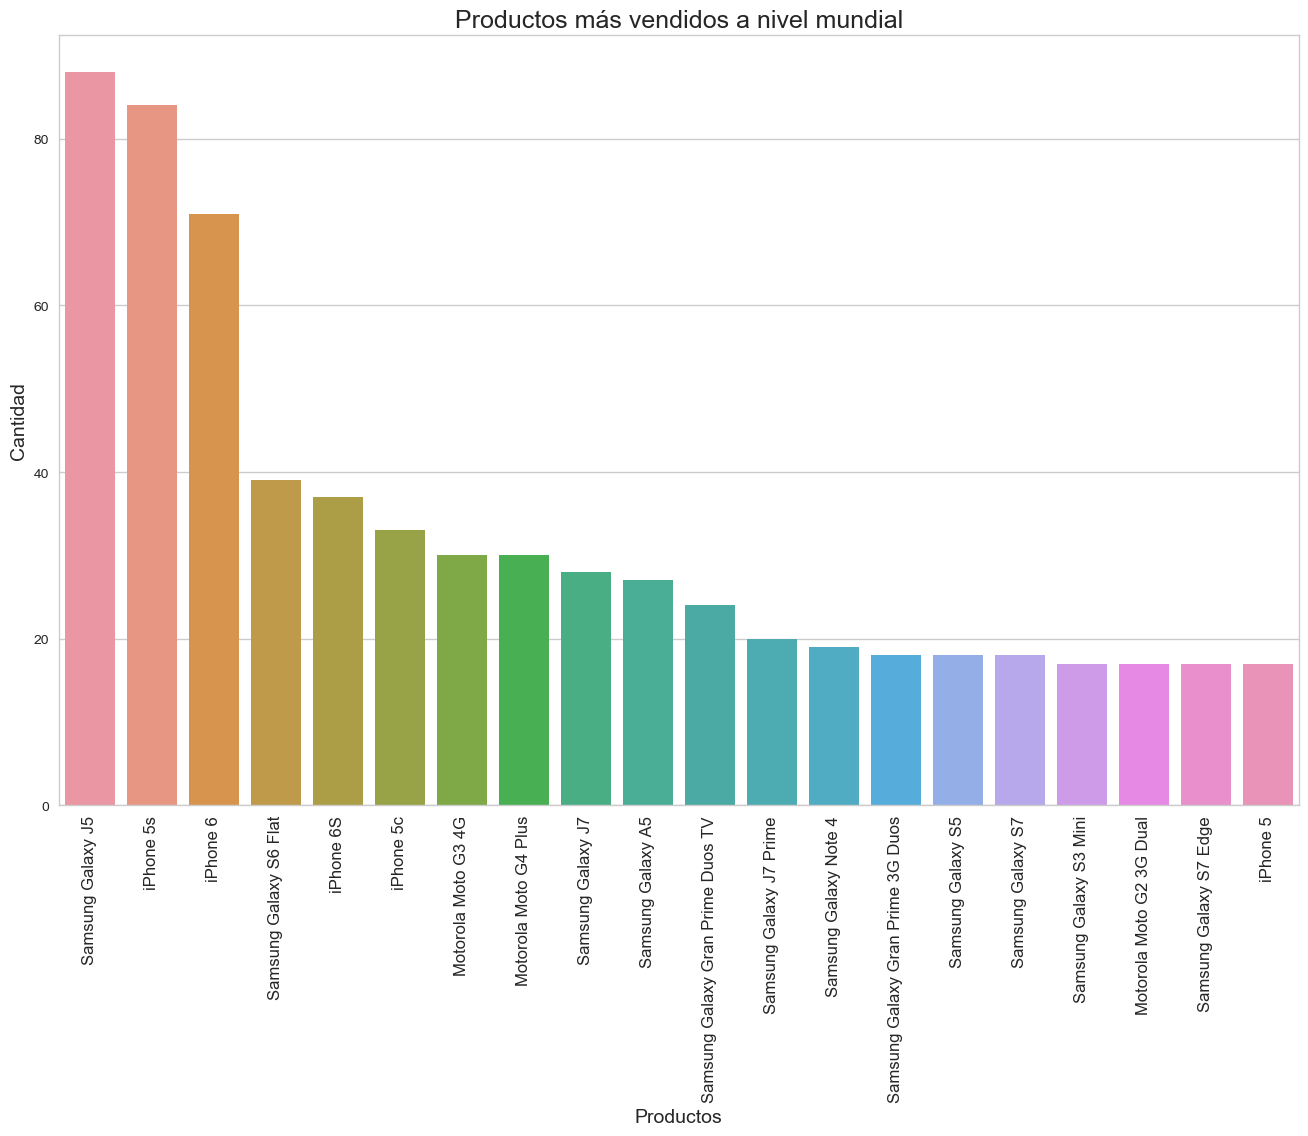

In [177]:
plt.figure(figsize=(16,10))
g = sns.barplot(x=model_most_sold.index, y=model_most_sold.values, orient='v')
plt.xticks(rotation=90, fontsize = 12)
    
g.set_title("Productos más vendidos a nivel mundial", fontsize=18)
g.set_xlabel("Productos", fontsize=14)
g.set_ylabel("Cantidad", fontsize=14)

In [178]:
model_most_sold

Samsung Galaxy J5                    88
iPhone 5s                            84
iPhone 6                             71
Samsung Galaxy S6 Flat               39
iPhone 6S                            37
iPhone 5c                            33
Motorola Moto G3 4G                  30
Motorola Moto G4 Plus                30
Samsung Galaxy J7                    28
Samsung Galaxy A5                    27
Samsung Galaxy Gran Prime Duos TV    24
Samsung Galaxy J7 Prime              20
Samsung Galaxy Note 4                19
Samsung Galaxy Gran Prime 3G Duos    18
Samsung Galaxy S5                    18
Samsung Galaxy S7                    18
Samsung Galaxy S3 Mini               17
Motorola Moto G2 3G Dual             17
Samsung Galaxy S7 Edge               17
iPhone 5                             17
Name: model, dtype: int64

# Usuarios atraidos por campañas

In [179]:
df_campaign_entries = df.loc[df['campaign_source'].notnull()]
df_campaign_person = df_campaign_entries.drop_duplicates('person')
df_campaign_person.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,21306,21306,21306,21285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,21216,1,21306,198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
top,2018-05-15 15:56:06,ad campaign hit,9e391451,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,21306,1,7510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La cantidad de gente que entro a la pagina por campaña por lo menos una vez es 21306

De los entries que son de campaign_source tenemos 82796

In [180]:
df_campaign = df.loc[df['campaign_source'].notnull()]
df_campaign.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,82796,82796,82796,82725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,82013,1,21306,227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
top,2018-06-04 20:11:05,ad campaign hit,a202cfba,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,82796,279,28314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Actividad de usuarios relacionados con alguna campaña

In [181]:
campaign_users = df_campaign['person'].drop_duplicates()
campaign_users.describe()

count        21306
unique       21306
top       9e391451
freq             1
Name: person, dtype: object

In [182]:
df_conversion_campaign = df.loc[df['person'].isin(campaign_users)]
df_conversion_campaign = df_conversion_campaign.loc[df_conversion_campaign['event'] == 'conversion']
conversion_person = df_conversion_campaign['person'].drop_duplicates()
df_conversion_campaign.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,962,962,962,0.0,962.0,962,962,962,962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,962,1,559,0.0,420.0,107,4,8,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
top,2018-01-09 20:11:54,conversion,252adec6,NaN,6371.0,Samsung Galaxy J5,Bom,16GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,962,15,NaN,28.0,71,448,469,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Compra de usuarios que tuvieron relacion con alguna campaña

In [183]:
df_conversion_campaign['timestamp'] = pd.to_datetime(df_conversion_campaign['timestamp'])
df_conversion_campaign['month'] = df_conversion_campaign['timestamp'].dt.month
df_conversion_campaign['count']=1
df_conversion_month = df_conversion_campaign.groupby('month').agg({'count':'sum'}).reset_index()

df_conversion_month.columns = ['month','conversions']

Estas son las compras en la pagina dado los meses por usuarios que alguna vez entraron a la pagina via campaña

In [184]:
df_campaign['timestamp'] = pd.to_datetime(df_campaign['timestamp'])
df_campaign['month'] = df_campaign['timestamp'].dt.month
df_campaign['count'] = 1
df_campaign_month = df_campaign.groupby('month').agg({'count':'sum'}).reset_index()
df_campaign_month.columns = ['month','people of campaign']

In [185]:
month_conversions_people = pd.merge(df_campaign_month, df_conversion_month, on='month', how='inner')
month_conversions_people

,month,people of campaign,conversions
0,1,1696,62
1,2,2339,73
2,3,6865,255
3,4,10880,287
4,5,38102,259
5,6,22914,26


Text(0.5,1,'Ingreso de personas involucradas en campaña al sitio')

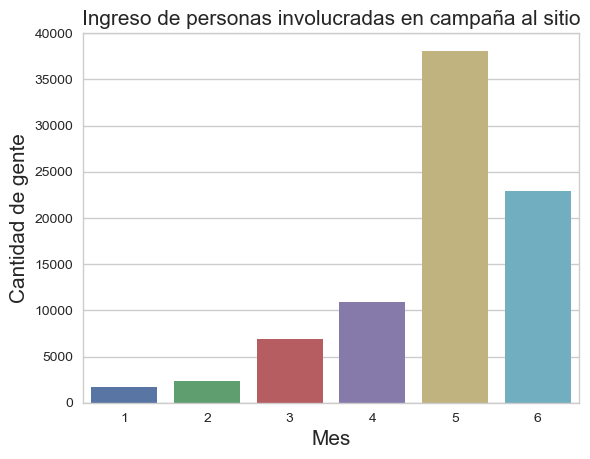

In [186]:
g =sns.barplot(x="month", y="people of campaign", data=month_conversions_people)
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Mes", fontsize=15)
g.set_ylabel("Cantidad de gente", fontsize=15)
g.set_title("Ingreso de personas involucradas en campaña al sitio", fontsize=15)


Viendo este grafico diriamos que los meses con mayores ventas serian 5 y 6 ya que tiene mas eventos en la pagina

Text(0.5,1,'Compras de personas involucradas en campaña al sitio')

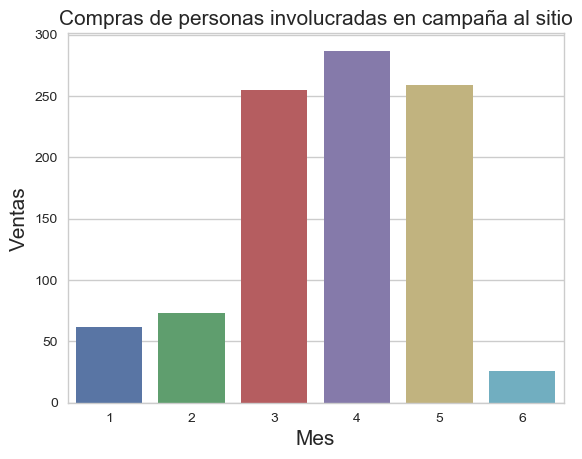

In [187]:
g =sns.barplot(x="month", y="conversions", data=month_conversions_people)
g.set_xlabel("Mes", fontsize=15)
g.set_ylabel("Ventas", fontsize=15)
g.set_title("Compras de personas involucradas en campaña al sitio", fontsize=15)


Podemos ver que este no fue el caso ya que el mes 4 fue el que consigio mas ventas

Text(0.5,1,'Compras de personas involucradas en campaña al sitio')

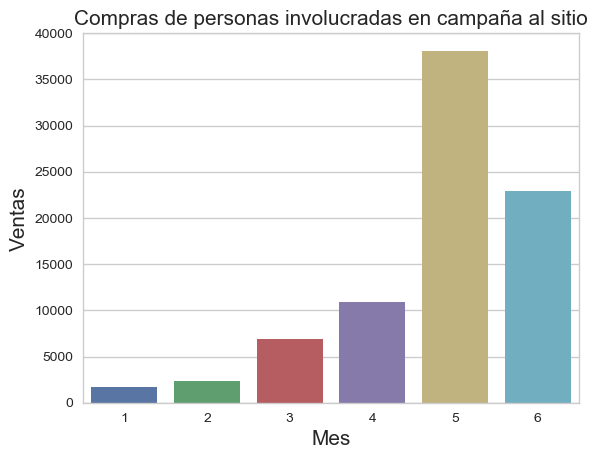

In [189]:
df_campaign_entries = df.loc[df['campaign_source'].notnull()]
df_campaign_person = df_campaign_entries.drop_duplicates('person')
df_campaign_person.describe()

#La cantidad de gente que entro a la pagina por campaña por lo menos una vez es 21306

#De los entries que son de campaign_source tenemos 82796

df_campaign = df.loc[df['campaign_source'].notnull()]
df_campaign.describe()

#Actividad de usuarios relacionados con alguna campaña

campaign_users = df_campaign['person'].drop_duplicates()
campaign_users.describe()

df_conversion_campaign = df.loc[df['person'].isin(campaign_users)]
df_conversion_campaign = df_conversion_campaign.loc[df_conversion_campaign['event'] == 'conversion']
conversion_person = df_conversion_campaign['person'].drop_duplicates()
df_conversion_campaign.describe()

#Compra de usuarios que tuvieron relacion con alguna campaña

df_conversion_campaign['timestamp'] = pd.to_datetime(df_conversion_campaign['timestamp'])
df_conversion_campaign['month'] = df_conversion_campaign['timestamp'].dt.month
df_conversion_campaign['count']=1
df_conversion_month = df_conversion_campaign.groupby('month').agg({'count':'sum'}).reset_index()

df_conversion_month.columns = ['month','conversions']

#Estas son las compras en la pagina dado los meses por usuarios que alguna vez entraron a la pagina via campaña

df_campaign['timestamp'] = pd.to_datetime(df_campaign['timestamp'])
df_campaign['month'] = df_campaign['timestamp'].dt.month
df_campaign['count'] = 1
df_campaign_month = df_campaign.groupby('month').agg({'count':'sum'}).reset_index()
df_campaign_month.columns = ['month','people of campaign']

month_conversions_people = pd.merge(df_campaign_month, df_conversion_month, on='month', how='inner')
month_conversions_people

g =sns.barplot(x="month", y="people of campaign", data=month_conversions_people)
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Mes", fontsize=15)
g.set_ylabel("Cantidad de gente", fontsize=15)
g.set_title("Ingreso de personas involucradas en campaña al sitio", fontsize=15)


#Viendo este grafico diriamos que los meses con mayores ventas serian 5 y 6 ya que tiene mas eventos en la pagina

g =sns.barplot(x="month", y="conversions", data=month_conversions_people)
g.set_xlabel("Mes", fontsize=15)
g.set_ylabel("Ventas", fontsize=15)
g.set_title("Compras de personas involucradas en campaña al sitio", fontsize=15)


#Podemos ver que este no fue el caso ya que el mes 4 fue el que consigio mas ventas